# Análise de Dados

## Coleta de Dados

Estrutura de Dados:
- **Dado não estruturado**: texto, imagem, aúdio, etc.
- **Dado semi estruturado**: html, json, etc.
- **Dado estruturado**: tabelas, planilhas, etc.

### Arquivos CSV
Um arquivo **csv** é um tipo de arquivo de **texto** com uma estrutura específica (**estruturado**) para organizar os dados num formato tabular:
- **Linhas** são separadas pelo caracter de nova linha `'\n'`, normalmente a primeira linha é o cabeçalho (*header*);
- **Colunas** por um separador: `','` (mais comum), `';'`, etc.

Preparando o ambiente escrevendo arquivo csv para análise (o código abaixo não é Python):

In [1]:
%%writefile banco.csv
age,job,marital,education,default,balance,housing,loan
30,unemployed,married,primary,no,1787,no,no
33,services,married,secondary,no,4789,yes,yes
35,management,single,tertiary,no,1350,yes,no
30,management,married,tertiary,no,1476,yes,yes
59,blue-collar,married,secondary,no,0,yes,no
35,management,single,tertiary,no,747,no,no
36,self-employed,married,tertiary,no,307,yes,no
39,technician,married,secondary,no,147,yes,no
41,entrepreneur,married,tertiary,no,221,yes,no
43,services,married,primary,no,-88,yes,yes

Writing banco.csv


**Exemplo:**

In [4]:
# extraindo valores da primeira coluna e armazenando em uma lista

idades = []

with open(file='./banco.csv', mode='r', encoding='utf8') as arquivo:
    cabecalho = arquivo.readline().split(sep=',')
    indice_idade = cabecalho.index('age')
    linha = arquivo.readline()
    while linha:
        idade = linha.split(sep=',')[indice_idade]
        idades.append(idade)
        linha = arquivo.readline()

print(idades)

tipos_idades = set(map(lambda idade: type(idade), idades))
print(tipos_idades)

['30', '33', '35', '30', '59', '35', '36', '39', '41', '43']
{<class 'str'>}


In [5]:
# média

from functools import reduce

soma_idades = reduce(lambda idade_a, idade_b: idade_a + idade_b, map(lambda idade: int(idade), idades))
qtd_idades = len(idades)

media_idades = soma_idades / qtd_idades
print(f"A média das idades é de {media_idades}.")

A média das idades é de 38.1.


### Pacote CSV
Pacote nativo do Python que facilita a leitura de arquivos no formato CSV.

In [7]:
# extraindo valores da coluna 'balance' e armazenando em uma lista

import csv

saldos = None

with open(file='./banco.csv', mode='r', encoding='utf8') as arquivo:
    leitor_csv_iter = csv.reader(arquivo, delimiter=',') # indicar o separador no método reader
    cabecalho = next(leitor_csv_iter) # a instância da classe csv.reader é um iterador
    indice_saldo = cabecalho.index('balance')
    saldos = [linha[indice_saldo] for linha in leitor_csv_iter]

print(saldos)

['1787', '4789', '1350', '1476', '0', '747', '307', '147', '221', '-88']


In [9]:
from functools import reduce

soma_saldos = reduce(lambda saldo_a, saldo_b: saldo_a + saldo_b, map(lambda saldo: int(saldo), saldos))
qtd_saldos = len(saldos)

media_saldos = soma_saldos / qtd_saldos
print(f"A média dos saldos é de {media_saldos}.")

A média dos saldos é de 1073.6.


### Arquivos texto
Um arquivo **texto** é um tipo de arquivo de **texto** sem uma estrutura definida (**não estruturado**). 

Preparando o ambiente escrevendo arquivo texto (cópia da página do nubank) para análise (o código abaixo não é Python):

In [10]:
%%writefile nubank.txt
Como você prefere falar com a gente?

E-mail
Tem alguma dúvida? Podemos te ajudar pelo nosso canal de email.
meajuda@nubank.com.br

Telefone
Você pode ligar para o 0800 do Nubank a qualquer hora através do número abaixo.
0800 608 6236

Chat
Precisa de uma ajuda agora? Entre em contato com nosso atendimento através do chat.
Basta abrir o chat no app.

Siga o @Nubank
Saiba das novidades e receba dicas na nossas redes sociais e também na NuCommunity, a comunidade online oficial do Nubank.

Imprensa
Reunimos todas as informações para você aqui.
press@nu.bank

Ouvidoria
Já conversou conosco e mesmo assim não
conseguiu resolver o que precisava? Nossa
Ouvidoria pode avaliar seu caso.
0800 887 0463
ouvidoria@nubank.com.br

Atendemos em dias úteis das 9h às 18h
(horário de São Paulo/SP).

Parcerias
Se você tem uma proposta de patrocínio, parceria
ou publicidade, fale conosco por aqui: marketing@nubank.com.br

Writing nubank.txt


**Exemplo:**

In [15]:
# extraindo linhas

with open(file='./nubank.txt', mode='r', encoding='utf8') as arquivo:
    linhas = arquivo.readlines()

linhas = filter(lambda linha: linha != '\n', linhas) # retira linhas em branco
linhas = map(lambda linha: linha.strip(), linhas) # retira o caractere '\n' de quebra de linha
linhas = list(linhas)    

print(linhas)

['Como você prefere falar com a gente?', 'E-mail', 'Tem alguma dúvida? Podemos te ajudar pelo nosso canal de email.', 'meajuda@nubank.com.br', 'Telefone', 'Você pode ligar para o 0800 do Nubank a qualquer hora através do número abaixo.', '0800 608 6236', 'Chat', 'Precisa de uma ajuda agora? Entre em contato com nosso atendimento através do chat.', 'Basta abrir o chat no app.', 'Siga o @Nubank', 'Saiba das novidades e receba dicas na nossas redes sociais e também na NuCommunity, a comunidade online oficial do Nubank.', 'Imprensa', 'Reunimos todas as informações para você aqui.', 'press@nu.bank', 'Ouvidoria', 'Já conversou conosco e mesmo assim não', 'conseguiu resolver o que precisava? Nossa', 'Ouvidoria pode avaliar seu caso.', '0800 887 0463', 'ouvidoria@nubank.com.br', 'Atendemos em dias úteis das 9h às 18h', '(horário de São Paulo/SP).', 'Parcerias', 'Se você tem uma proposta de patrocínio, parceria', 'ou publicidade, fale conosco por aqui: marketing@nubank.com.br']


In [16]:
# extraindo linhas com o texto '.com'

linhas_com_email = filter(lambda linha: '.com' in linha, linhas)
linhas_com_email = list(linhas_com_email)

print(linhas_com_email)

['meajuda@nubank.com.br', 'ouvidoria@nubank.com.br', 'ou publicidade, fale conosco por aqui: marketing@nubank.com.br']


In [20]:
# extraindo e-mails

emails_extraidos = []

for linha_com_email in linhas_com_email:
    palavras = linha_com_email.split(sep=' ')
    emails = filter(lambda palavra: '@' in palavra, palavras)
    emails_extraidos = emails_extraidos + list(emails) # concatena listas, pois emails é objeto e precisa usar list()

print(emails_extraidos)

# Obs.: em geral, não se consegue extrair toda informação de arquivo não estruturado (faltou press@nu.bank)

['meajuda@nubank.com.br', 'ouvidoria@nubank.com.br', 'marketing@nubank.com.br']


### REGEX (módulo re)
É um algoritmo de busca de padrões em strings e é implementado nativamente em diversas linguagens de programação. Você pode ler mais sobre regex neste [link](https://medium.com/javarevisited/7-best-regular-expression-courses-for-developers-to-learn-in-2021-9b8cb37bb3a5) e testar seu regex na ferramenta online deste [link](https://regexr.com/). Documentação do módulo neste [link](https://docs.python.org/3.9/library/re.html).

In [21]:
# extraindo e-mails

import re

with open(file='./nubank.txt', mode='r', encoding='utf8') as arquivo:
    texto = arquivo.read()

emails_extraidos = re.findall('\S+@\S+', texto) # método de busca
print(emails_extraidos)

['meajuda@nubank.com.br', 'press@nu.bank', 'ouvidoria@nubank.com.br', 'marketing@nubank.com.br']


In [22]:
# estruturando os dados escrevendo os e-mails em um arquivo csv

import csv

with open(file='./nubank.csv', mode='w', encoding='utf8') as arquivo:
    escritor_csv = csv.writer(arquivo, delimiter=';') # indicar o separador
    escritor_csv.writerows([['email']] + list(map(lambda email_extraido: [email_extraido], emails_extraidos))) # lista composta

### Arquivos Excel (com pacote openpyxl)
Um arquivo tabular (**estruturado**) nativo do Windows, sistema operacional da Microsoft. A documentação do pacote openpyxl pode ser encontrada neste [link](https://openpyxl.readthedocs.io/en/stable/index.html).

In [27]:
# extraindo valores de uma planilha em Excel

from openpyxl import load_workbook

saldos = []

planilhas = load_workbook(filename='banco.xlsx')
planilha = planilhas.active # planilha da pasta do Excel

cabecalho = next(planilha.values) # iterável
indice_saldo = cabecalho.index('balance')
saldos = [linha[indice_saldo] for linha in planilha.values if linha[indice_saldo] != 'balance'] # next() não pulou cabeçalho

print(saldos)
print(set(map(lambda saldo: type(saldo), saldos))) # já trouxe como inteiro e não como string

[1787, 4789, 1350, 1476, 0, 747, 307, 147, 221, -88]
{<class 'int'>}


In [28]:
# média

from functools import reduce

soma_saldos = reduce(lambda saldo_a, saldo_b: saldo_a + saldo_b, saldos)
qtd_saldos = len(saldos)

media_saldos = soma_saldos / qtd_saldos
print(f"A média dos saldos é de {media_saldos}.")

A média dos saldos é de 1073.6.


### HTTP
O HTTP (hypertext transfer protocol) é um protocolo de transferência de hipertexto (texto, imagens, vídeos, etc.). É o protocolo padrão de transferência de informação pela internet. </br>
Métodos são as operações que podemos realizar com o protocolo para interagir com um servidor, você pode encontrar uma lista completa neste [link](https://developer.mozilla.org/pt-BR/docs/Web/HTTP/Methods). Os mais importantes são:
- **GET**: Requisitar dados, (acessar uma página web, carregar o feed do instagram, etc.);
- **POST**: Enviar dados (login, cadastro, mensagem whatsapp, tweet do Twitter).

Códigos de retorno são as números de 0 a 1000 que recebemos como resposta do servidor ao realizar uma operação qualquer, você pode encontrar uma lista completa neste [link](https://developer.mozilla.org/pt-BR/docs/Web/HTTP/Status). Os mais importantes são:
- Entre **200** e **299**: Sucesso;
- Entre **400** e **499**: Erro do cliente;
- Entre **500** e **599**: Erro do servidor.

Obs.: Código **200** (sucesso) é o mais comum e o **404** (não encontrado) o mais famoso!</br>
</br>
O pacote **requests** é usado para interagir com a web através do protocolo HTTP. A documentação pode ser encontrada neste ([link](https://docs.python-requests.org/en/master/)).

In [1]:
# verificando o retorno e o conteudo de uma página web

import requests
from requests.exceptions import HTTPError

conteudo = None
URL = 'http://www.google.com/icaro'

try:
    resposta = requests.get(URL)
    resposta.raise_for_status()
except HTTPError as exc:
    print(exc)
else:
    conteudo = resposta.text

print(conteudo)

404 Client Error: Not Found for url: http://www.google.com/icaro
None


### Web Crawl
Aplicação que interage com a web de forma automatizada, também conhecido como *web spider* ou *bot*. O pacote **requests** funciona bem para interaçõces simples (apenas metodos HTTP) já os pacotes **selenium** ([documentação](https://selenium-python.readthedocs.io/)) e **scrapy** ([documentação](https://docs.scrapy.org/en/latest/)) permitem que você navegue pela internet. </br>
</br>
ATENÇÃO! **Web crawling** é um tema que **requer muito cuidado**, em geral você precisa de autorização do website para acessa-lo automaticamente. Empresas que usam a tecnologia possuem departamento jurídicos dedicados ao assunto. </br>
> A maioria dos sites fornece um arquivo chamado `robots.txt` informando como um web crawler pode interagir com a página.

In [2]:
# criando e usando uma função de web crawler para ver o robots.txt da página

import requests
from requests.exceptions import HTTPError

def crawl_website(url:str) -> str:
    try:
        resposta = requests.get(url)
        resposta.raise_for_status()
    except HTTPError as exc:
        print(exc)
    else:
        return resposta.text
    
URL = 'https://en.wikipedia.org/robots.txt'

conteudo = crawl_website(url=URL)
print(conteudo)

﻿# robots.txt for http://www.wikipedia.org/ and friends
#
# Please note: There are a lot of pages on this site, and there are
# some misbehaved spiders out there that go _way_ too fast. If you're
# irresponsible, your access to the site may be blocked.
#

# Observed spamming large amounts of https://en.wikipedia.org/?curid=NNNNNN
# and ignoring 429 ratelimit responses, claims to respect robots:
# http://mj12bot.com/
User-agent: MJ12bot
Disallow: /

# advertising-related bots:
User-agent: Mediapartners-Google*
Disallow: /

# Wikipedia work bots:
User-agent: IsraBot
Disallow:

User-agent: Orthogaffe
Disallow:

# Crawlers that are kind enough to obey, but which we'd rather not have
# unless they're feeding search engines.
User-agent: UbiCrawler
Disallow: /

User-agent: DOC
Disallow: /

User-agent: Zao
Disallow: /

# Some bots are known to be trouble, particularly those designed to copy
# entire sites. Please obey robots.txt.
User-agent: sitecheck.internetseer.com
Disallow: /

User-agent: 

In [3]:
# usando a função para ver a página html

URL = 'https://en.wikipedia.org/wiki/Web_crawler'

conteudo = crawl_website(url=URL)
print(conteudo)

<!DOCTYPE html>
<html class="client-nojs vector-feature-language-in-header-enabled vector-feature-language-in-main-page-header-disabled vector-feature-sticky-header-disabled vector-feature-page-tools-pinned-disabled vector-feature-toc-pinned-enabled vector-feature-main-menu-pinned-disabled vector-feature-limited-width-enabled vector-feature-limited-width-content-enabled vector-feature-zebra-design-disabled" lang="en" dir="ltr">
<head>
<meta charset="UTF-8">
<title>Web crawler - Wikipedia</title>
<script>document.documentElement.className="client-js vector-feature-language-in-header-enabled vector-feature-language-in-main-page-header-disabled vector-feature-sticky-header-disabled vector-feature-page-tools-pinned-disabled vector-feature-toc-pinned-enabled vector-feature-main-menu-pinned-disabled vector-feature-limited-width-enabled vector-feature-limited-width-content-enabled vector-feature-zebra-design-disabled";(function(){var cookie=document.cookie.match(/(?:^|; )enwikimwclientprefs=(

### Formato HTML
Um arquivo **texto** semi-estruturado, organizado por **tags**, você pode encontrar uma lista completa neste [link](https://www.w3schools.com/tags/ref_byfunc.asp).

In [4]:
%%html
<html>
    <head>
        <!-- metadata -->
    </head>
    <body>
        <h3>Senhor dos Anéis</h3>
        <p>Filmes:</p>
        <ul>
            <li><b>2001:</b> O Senhor dos Anéis: A Sociedade do Anel</li>
            <li><b>2002:</b> O Senhor dos Anéis: As Duas Torres</li>
            <li><b>2003:</b> O Senhor dos Anéis: O Retorno do Rei</li>
        </ul>
    </body>
</html>

Preparando o ambiente criando uma página HTML:

In [5]:
%%writefile lotr.html
<html>
    <head>
        <!-- metadata -->
    </head>
    <body>
        <h3>Senhor dos Anéis</h3>
        <p>Filmes:</p>
        <ol>
            <li><b>2001:</b> O Senhor dos Anéis: A Sociedade do Anel</li>
            <li><b>2002:</b> O Senhor dos Anéis: As Duas Torres</li>
            <li><b>2003:</b> O Senhor dos Anéis: O Retorno do Rei</li>
        </ol>
    </body>
</html>

Writing lotr.html


O pacote **beautifulsoup4** é usado para extrair informações de arquivos HTML. A documentação pode ser encontrada neste ([link](https://www.crummy.com/software/BeautifulSoup/bs4/doc/)).

In [9]:
# filtrando filmes e anos do arquivo lotr.html

from bs4 import BeautifulSoup

pagina = BeautifulSoup(open('lotr.html', mode='r', encoding='utf8'), 'html.parser')
filmes_li = pagina.find_all('li')
print(filmes_li)

[<li><b>2001:</b> O Senhor dos Anéis: A Sociedade do Anel</li>, <li><b>2002:</b> O Senhor dos Anéis: As Duas Torres</li>, <li><b>2003:</b> O Senhor dos Anéis: O Retorno do Rei</li>]


In [10]:
# apesar de filtrado, o conteúdo não é uma string, mas sim uma instância da classe bs4.element.Tag

print(list(set(map(lambda filme_li: type(filme_li), filmes_li))))

[<class 'bs4.element.Tag'>]


In [11]:
# extraindo texto e colocando em um dicionário

filmes = []

for filme_li in filmes_li:
    filme = filme_li.get_text() # método que gera a string, separator = '', strip = False
    ano = int(filme.split(sep=':')[0].strip())
    titulo = ':'.join(filme.split(sep=':')[1:]).strip()
    filmes.append({'ano': ano, 'titulo': titulo})

for filme in filmes:
    print(filme)

{'ano': 2001, 'titulo': 'O Senhor dos Anéis: A Sociedade do Anel'}
{'ano': 2002, 'titulo': 'O Senhor dos Anéis: As Duas Torres'}
{'ano': 2003, 'titulo': 'O Senhor dos Anéis: O Retorno do Rei'}


### Web Scrape
Aplicação que extrai conteúdo de páginas web de forma automatizada, em geral é aplicado após o processo de **web crawling**.

In [15]:
# fazendo web crawling e escrevendo uma uma página html para armazenamento local

URL = 'https://en.wikipedia.org/wiki/Web_crawler'

conteudo = crawl_website(url=URL) # função criada em uma das células acima
with open(file='wiki.html', mode='w', encoding='utf8') as arquivo:
    arquivo.write(conteudo)

In [16]:
# extraindo texto da página html

from bs4 import BeautifulSoup

pagina = BeautifulSoup(open('wiki.html', mode='r', encoding='utf8'), 'html.parser')
texto = pagina.get_text()
print(texto)





Web crawler - Wikipedia





































Jump to content







Main menu





Main menu
move to sidebar
hide



		Navigation
	


Main pageContentsCurrent eventsRandom articleAbout WikipediaContact usDonate





		Contribute
	


HelpLearn to editCommunity portalRecent changesUpload file





Languages

Language links are at the top of the page across from the title.



















Search











Search








Create accountLog in






Personal tools





 Create account Log in





		Pages for logged out editors learn more



ContributionsTalk



























Contents
move to sidebar
hide




(Top)





1Nomenclature







2Overview







3Crawling policy



Toggle Crawling policy subsection





3.1Selection policy





3.1.1Restricting followed links







3.1.2URL normalization







3.1.3Path-ascending crawling







3.1.4Focused crawling





3.1.4.1Academic focused crawler







3.1.4.2Semantic focused crawler











3.2Re-vis

In [17]:
# filtrando e contando palavras procuradas

import re

ocorrencias = len(re.findall('crawler', texto, re.IGNORECASE))
print(ocorrencias)

175


### Formato JSON
Um arquivo semi-estruturado, organizado por **chave/valor**, é equivalente a um dicionário Python.

In [1]:
%%writefile lotr.json
[
    {
        "ano": 2001,
        "titulo": "O Senhor dos Anéis: A Sociedade do Anel"
    },
    {
        "ano": 2002,
        "titulo": "O Senhor dos Anéis: As Duas Torres"
    },
    {
        "ano": 2003,
        "titulo": "O Senhor dos Anéis: O Retorno do Rei"
    }
]

Writing lotr.json


O pacote **JSON** é usado para para interagir com dados no formato json.

In [8]:
# lendo e convertendo arquivo json para formato nativo do Python

import json

data = json.load(open(file='lotr.json', mode='r', encoding='utf8')) # converte string para lista de dicionários
print(data)
print(type(data))

[{'ano': 2001, 'titulo': 'O Senhor dos Anéis: A Sociedade do Anel'}, {'ano': 2002, 'titulo': 'O Senhor dos Anéis: As Duas Torres'}, {'ano': 2003, 'titulo': 'O Senhor dos Anéis: O Retorno do Rei'}]
<class 'list'>


In [7]:
# convertendo para json

data_json = json.dumps(data, indent=2, ensure_ascii=False) # converte lista de dicionários para string
print(data_json)
print(type(data_json))

[
  {
    "ano": 2001,
    "titulo": "O Senhor dos Anéis: A Sociedade do Anel"
  },
  {
    "ano": 2002,
    "titulo": "O Senhor dos Anéis: As Duas Torres"
  },
  {
    "ano": 2003,
    "titulo": "O Senhor dos Anéis: O Retorno do Rei"
  }
]
<class 'str'>


### Web API
Uma API (application programming interface) é uma interface de comunicação com uma aplicação no formato cliente/servidor. Uma REST API é uma API que segue o padrão HTTP e transfere dados (em geral) no formato JSON. APIs fechadas são pagas e exigem autenticação (via método HTTP POST). APIs abertas são gratuitas e podem exigir autenticação. </br>
Alguns exemplos:
- [Twitter](https://developer.twitter.com/en/docs);
- [Governo Federal](https://www.gov.br/conecta/catalogo/).

In [12]:
# extraindo a taxa CDI da API da B3

import json

import requests
from requests.exceptions import HTTPError

conteudo = None
URL = 'https://www2.cetip.com.br/ConsultarTaxaDi/ConsultarTaxaDICetip.aspx'

try:
    resposta = requests.get(URL)
    resposta.raise_for_status()
except HTTPError as exc:
    print(exc)
else:
    conteudo = resposta.text

data = json.loads(conteudo) # convertendo para dicionário
print(data)

cdi = float(data['taxa'].replace(',', '.'))
print(f'Taxa CDI: {cdi}')

{'taxa': '13,15', 'dataTaxa': '07/08/2023', 'indice': '40.860,32', 'dataIndice': '07/08/2023'}
Taxa CDI: 13.15


## Data Wrangling

### DataFrame Pandas
O **Pandas** é um pacote Python para manipulação de dados (talvez o mais utilizado). Seu nome significa *Panel Data Analysis* e sua documentação pode ser encontrada neste [link](https://pandas.pydata.org/docs/). A abstração base do pandas é o DataFrame, uma estrutura de dados Python de duas dimensões utilizado para representar tabelas.

In [65]:
# criando um DataFrame a partir de um dicionário

import pandas as pd

transacoes = dict(
    id=[571, 572, 573], 
    data=['19-01-2021', '19-01-2021', '23-01-2021'], 
    valor=[371.30, 57.19, 101.21], 
    categoria=['supermercado', 'farmacia', 'outros']
)

transacoes_df = pd.DataFrame(transacoes)

transacoes_df

,id,data,valor,categoria
0,571,19-01-2021,371.30,supermercado
1,572,19-01-2021,57.19,farmacia
2,573,23-01-2021,101.21,outros


In [66]:
# trata-se de uma instância da classe pandas.core.frame.DataFrame 

type(transacoes_df)

pandas.core.frame.DataFrame

In [67]:
# atributo para conhecer as colunas

transacoes_df.columns # pandas identifica string como object

Index(['id', 'data', 'valor', 'categoria'], dtype='object')

In [9]:
# alterando os nomes das colunas

# transacoes_df.columns = ['ID', 'Data', 'Valor', 'Categoria']

In [68]:
# atributo para conhecer os tipos de dados das colunas

transacoes_df.dtypes

id             int64
data          object
valor        float64
categoria     object
dtype: object

In [69]:
# atributo para conhecer o index

transacoes_df.index

RangeIndex(start=0, stop=3, step=1)

In [70]:
# atributo para conhecer a tabela (n linhas, n colunas)

transacoes_df.shape

(3, 4)

In [71]:
# método para visualizar as primeiras (n=5 por default) linhas

transacoes_df.head(n=2)

,id,data,valor,categoria
0,571,19-01-2021,371.30,supermercado
1,572,19-01-2021,57.19,farmacia


In [72]:
# método para visualizar uma amostra aleatória (n=1 por default)

transacoes_df.sample(n=3)

,id,data,valor,categoria
0,571,19-01-2021,371.30,supermercado
2,573,23-01-2021,101.21,outros
1,572,19-01-2021,57.19,farmacia


In [73]:
# método para visualizar as últimas (n=5 por default) linhas

transacoes_df.tail(n=2)

,id,data,valor,categoria
1,572,19-01-2021,57.19,farmacia
2,573,23-01-2021,101.21,outros


In [26]:
# alterando tipo de dado da coluna

# transacoes_df = transacoes_df.astype({'ID':'object', 'Categoria': 'object'}) # não existe inplace = True nesta função

In [74]:
# método para mostrar um resumo (metadados) da tabela

transacoes_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3 entries, 0 to 2
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   id         3 non-null      int64  
 1   data       3 non-null      object 
 2   valor      3 non-null      float64
 3   categoria  3 non-null      object 
dtypes: float64(1), int64(1), object(2)
memory usage: 224.0+ bytes


In [75]:
# fatiando as 2 primeiras linhas

transacoes_df[0:2]

,id,data,valor,categoria
0,571,19-01-2021,371.30,supermercado
1,572,19-01-2021,57.19,farmacia


In [76]:
# fatiando colunas: use os nomes

minhas_colunas = ['categoria', 'valor']
transacoes_df[minhas_colunas].head(3) # transacoes_df[['Categoria', 'Valor']].head(3)

,categoria,valor
0,supermercado,371.30
1,farmacia,57.19
2,outros,101.21


In [78]:
# método para descrever colunas numéricas

transacoes_df[['id','valor']].describe().T # describe() traz contagem, média, desvio, max, min e quartis 

,count,mean,std,min,25%,50%,75%,max
id,3.0,572.000000,1.000000,571.00,571.5,572.00,572.500,573.0
valor,3.0,176.566667,170.074229,57.19,79.2,101.21,236.255,371.3


In [79]:
# quando não especifica as colunas, também usa colunas numéricas

transacoes_df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,3.0,572.000000,1.000000,571.00,571.5,572.00,572.500,573.0
valor,3.0,176.566667,170.074229,57.19,79.2,101.21,236.255,371.3


In [80]:
# método para descrever colunas categóricas

transacoes_df[['data', 'categoria']].describe().T # o T no final é para fazer a transposta para melhor visualização

,count,unique,top,freq
data,3,2,19-01-2021,2
categoria,3,3,supermercado,1


In [82]:
# sem precisar especificar as colunas categóricas

transacoes_df.describe(include='object').T

,count,unique,top,freq
data,3,2,19-01-2021,2
categoria,3,3,supermercado,1


preparando ambiente escrevendo um arquivo csv

In [20]:
%%writefile github.csv
ranking;project;language;stars;stars_today;forks
1;plow;go;1304;574;38
2;n8n;typescript;15668;280;1370
3;slides;go;3218;265;80
4;defi-developer-road-map;;636;247;49
5;pytorch-image-models;python;11065;101;1646
6;javascript-algorithms;javascript;110768;248;18331
7;paddleclas;python;1429;283;323
8;reddit_sentiment_trader;python;369;71;60
9;augly;python;2849;393;99
10;self-taught-guide-to-cloud-computing;;863;179;84

Writing github.csv


In [1]:
# criando um DataFrame a partir de um arquivo CSV

import pandas as pd

github_df = pd.read_csv('github.csv', sep=';')

github_df

,ranking,project,language,stars,stars_today,forks
0,1,plow,go,1304,574,38
1,2,n8n,typescript,15668,280,1370
2,3,slides,go,3218,265,80
3,4,defi-developer-road-map,NaN,636,247,49
4,5,pytorch-image-models,python,11065,101,1646
5,6,javascript-algorithms,javascript,110768,248,18331
6,7,paddleclas,python,1429,283,323
7,8,reddit_sentiment_trader,python,369,71,60
8,9,augly,python,2849,393,99
9,10,self-taught-guide-to-cloud-computing,NaN,863,179,84


In [100]:
# carregar apenas algumas colunas

pd.read_csv('github.csv', sep=';', usecols=['ranking', 'project', 'language'] )

,ranking,project,language
0,1,plow,go
1,2,n8n,typescript
2,3,slides,go
3,4,defi-developer-road-map,NaN
4,5,pytorch-image-models,python
5,6,javascript-algorithms,javascript
6,7,paddleclas,python
7,8,reddit_sentiment_trader,python
8,9,augly,python
9,10,self-taught-guide-to-cloud-computing,NaN


In [101]:
# carregar apenas algumas linhas

pd.read_csv('github.csv', sep=';', nrows=3)

,ranking,project,language,stars,stars_today,forks
0,1,plow,go,1304,574,38
1,2,n8n,typescript,15668,280,1370
2,3,slides,go,3218,265,80


### Seleção e Filtros no DataFrame

**Anatomia de um DataFrame:**
- **Série**: Coluna de um DataFrame;
- **Índice**: Indentificador de uma linha de um DataFrame.

In [2]:
# Para selecionar uma coluna utilizamos a seguinte notação (similiar a indexação de listas Python):
# serie = dataframe['<nome-da-coluna>']

linguagem_serie = github_df['language']

linguagem_serie

0            go
1    typescript
2            go
3           NaN
4        python
5    javascript
6        python
7        python
8        python
9           NaN
Name: language, dtype: object

In [103]:
# trata-se de uma instância da classe pandas.core.series.Series

type(linguagem_serie)

pandas.core.series.Series

In [104]:
# Indexação simples da série com método loc (similar a lista Python):

top_1_linguagem = linguagem_serie.loc[0] # locate linha de índice 0

top_1_linguagem

'go'

In [105]:
# trata-se do Python nativo, a variável agora já é uma string

type(top_1_linguagem)

str

In [106]:
# fatiamento

top_5_linguagem = linguagem_serie.loc[0:4] # os números são inclusivos, pois são os "nomes dos índices"

top_5_linguagem

0            go
1    typescript
2            go
3           NaN
4        python
Name: language, dtype: object

In [107]:
# neste caso, para mais de 1 valor a variável ainda é uma série

type(top_5_linguagem)

pandas.core.series.Series

In [108]:
# transformando em uma lista

top_5_linguagem = list(top_5_linguagem)

top_5_linguagem

['go', 'typescript', 'go', nan, 'python']

In [109]:
# filtro funcional: filtrando pelo valor

linguagem_serie[lambda linguagem: linguagem == 'python']

4    python
6    python
7    python
8    python
Name: language, dtype: object

In [110]:
# arrumando os índices da nova série

linguagem_serie[lambda linguagem: linguagem == 'python'].reset_index(drop=True)

0    python
1    python
2    python
3    python
Name: language, dtype: object

In [111]:
# uma comparação retorna verdadeiro ou falso para cada linha no Pandas

linguagem_serie == 'python' # github_df.language == 'python'

0    False
1    False
2    False
3    False
4     True
5    False
6     True
7     True
8     True
9    False
Name: language, dtype: bool

In [112]:
# fatiando pelo valor sem a necessidade da função lambda

condicao = linguagem_serie == 'python'
linguagem_serie[condicao] # linguagem_serie[ linguagem_serie == 'python' ]

4    python
6    python
7    python
8    python
Name: language, dtype: object

In [3]:
# um conjunto de colunas ou séries é um novo dataframe. Para selecionar um conjunto de colunas utilizamos a seguinte notação:
# novo_dataframe = dataframe[['<nome-da-coluna-a>', '<nome-da-coluna-b>', ...]]

ranking_linguagem_df = github_df[['ranking', 'language']] # lista dentro de um fatiamento

ranking_linguagem_df

,ranking,language
0,1,go
1,2,typescript
2,3,go
3,4,NaN
4,5,python
5,6,javascript
6,7,python
7,8,python
8,9,python
9,10,NaN


In [46]:
# ainda é uma instância da classe pandas.core.frame.DataFrame

type(ranking_linguagem_df)

pandas.core.frame.DataFrame

In [4]:
# indexação simples (linha) com método loc (similar a lista Python):

top_1_linguagem = ranking_linguagem_df.loc[0]

top_1_linguagem # o índice passa a ser a coluna

ranking      1
language    go
Name: 0, dtype: object

In [48]:
# a linha trata-se de uma série

type(top_1_linguagem)

pandas.core.series.Series

In [5]:
# indexação simples (linha e coluna) com método loc (similar a lista Python):

top_1_linguagem = github_df.loc[0, ['ranking', 'language']] # faz direto do DataFrame original [linha, coluna]

top_1_linguagem # mesmo resultado, ou seja, não era necessário selecionar colunas para depois selecionar linhas

ranking      1
language    go
Name: 0, dtype: object

In [50]:
type(top_1_linguagem)

pandas.core.series.Series

In [6]:
# fatiamento ou slicing (linhas) com método loc (similar a lista Python):

top_5_ranking_linguagem = ranking_linguagem_df.loc[0:4]

top_5_ranking_linguagem # tipo: DataFrame

,ranking,language
0,1,go
1,2,typescript
2,3,go
3,4,NaN
4,5,python


In [7]:
# fatiamento ou slicing (linhas e colunas) com método loc (similar a lista Python):

top_5_ranking_linguagem = github_df.loc[0:4, ['ranking', 'language']] # diretamente do DF original

top_5_ranking_linguagem

,ranking,language
0,1,go
1,2,typescript
2,3,go
3,4,NaN
4,5,python


In [50]:
# fatiamento ou slicing (linhas e colunas) com método iloc

github_df.iloc[3:6, 0:2] # os números são exlusivos, pois são os "valores dos índices"

,ranking,project
3,4,defi-developer-road-map
4,5,pytorch-image-models
5,6,javascript-algorithms


In [56]:
# comparação

ranking_linguagem_df.language == 'python'

0    False
1    False
2    False
3    False
4     True
5    False
6     True
7     True
8     True
9    False
Name: language, dtype: bool

In [57]:
# filtro pelo valor

ranking_linguagem_df[ranking_linguagem_df.language == 'python']

,ranking,language
4,5,python
6,7,python
7,8,python
8,9,python


In [53]:
# filtro de linhas das colunas ranking e language com o método query

ranking_linguagem_df.query('language == "python"')

,ranking,language
4,5,python
6,7,python
7,8,python
8,9,python


In [58]:
# filtrando linguagens que estejam numa lista

ranking_linguagem_df.query('language in ["python", "go"]')

,ranking,language
0,1,go
2,3,go
4,5,python
6,7,python
7,8,python
8,9,python


In [54]:
# filtro mais específico com o método query

ranking_linguagem_df.query('language == "python" & ranking > 5') # utiliza "e" para séries diferentes

,ranking,language
6,7,python
7,8,python
8,9,python


In [55]:
# filtro mais específico com o método query

ranking_linguagem_df.query('language == "python" | language == "go"') # pode utilizar "ou" para a mesma série

,ranking,language
0,1,go
2,3,go
4,5,python
6,7,python
7,8,python
8,9,python


### Inserção, Deleção e Atualização

In [56]:
# adição de elementos em uma série com o método append

linguagem_serie.append(pd.Series(['java', 'python']), ignore_index=True)

C:\Users\User\AppData\Local\Temp\ipykernel_7896\2610456416.py:3: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  linguagem_serie.append(pd.Series(['java', 'python']), ignore_index=True)


0             go
1     typescript
2             go
3            NaN
4         python
5     javascript
6         python
7         python
8         python
9            NaN
10          java
11        python
dtype: object

In [57]:
# atualização - adição de elementos em uma série com o método concat

pd.concat([linguagem_serie, pd.Series(['java', 'python'])], ignore_index=True)

0             go
1     typescript
2             go
3            NaN
4         python
5     javascript
6         python
7         python
8         python
9            NaN
10          java
11        python
dtype: object

In [58]:
linguagem_serie # série é imutável, portanto não se altera se não atribuir à variável

0            go
1    typescript
2            go
3           NaN
4        python
5    javascript
6        python
7        python
8        python
9           NaN
Name: language, dtype: object

In [59]:
# linguagem_serie = linguagem_serie.append(pd.Series('java'), ignore_index=True)
linguagem_serie = pd.concat([linguagem_serie, pd.Series('java')], ignore_index=True)
linguagem_serie

C:\Users\User\AppData\Local\Temp\ipykernel_7896\3457793997.py:1: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  linguagem_serie = linguagem_serie.append(pd.Series('java'), ignore_index=True)


0             go
1     typescript
2             go
3            NaN
4         python
5     javascript
6         python
7         python
8         python
9            NaN
10          java
dtype: object

In [60]:
# remoção de elementos com filtro funcional:

# linguagem_serie = linguagem_serie[lambda linguagem: linguagem != 'python']
linguagem_serie = linguagem_serie[linguagem_serie != 'python']
linguagem_serie

0             go
1     typescript
2             go
3            NaN
5     javascript
9            NaN
10          java
dtype: object

In [61]:
# atualização de elementos com indexação simples

linguagem_serie.loc[0] = 'Go' # G maiúsculo
linguagem_serie

0             Go
1     typescript
2             go
3            NaN
5     javascript
9            NaN
10          java
dtype: object

In [62]:
# atualização de elementos com fatiamento ou slicing

linguagem_serie.loc[0:2] = pd.Series(['Go', 'Typescript', 'Go'])
linguagem_serie

0             Go
1     Typescript
2             Go
3            NaN
5     javascript
9            NaN
10          java
dtype: object

In [84]:
# atualização de elementos com filtro funcional

linguagem_serie = github_df['language']
# linguagem_serie[lambda linguagem: linguagem == 'python'] = 'Python'
linguagem_serie[linguagem_serie == 'python'] = 'Python'
linguagem_serie

# obs: SettingWithCopyWarning indica que a operação que pode estar alterando uma cópia dos dados, em vez dos dados originais.

C:\Users\User\AppData\Local\Temp\ipykernel_2164\60014194.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  linguagem_serie[lambda linguagem: linguagem == 'python'] = 'Python'


0            go
1    typescript
2            go
3           NaN
4        Python
5    javascript
6        Python
7        Python
8        Python
9           NaN
Name: language, dtype: object

In [64]:
# adição de linhas em um DataFrame com o método append

projeto = dict(ranking=[11], project=['signoz'], language=['typescript'], stars=[2651], stars_today=[491], forks=[115])

github_df.append(pd.DataFrame(projeto), ignore_index=True)

C:\Users\User\AppData\Local\Temp\ipykernel_7896\2035860369.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  github_df.append(pd.DataFrame(projeto), ignore_index=True)


,ranking,project,language,stars,stars_today,forks
0,1,plow,go,1304,574,38
1,2,n8n,typescript,15668,280,1370
2,3,slides,go,3218,265,80
3,4,defi-developer-road-map,NaN,636,247,49
4,5,pytorch-image-models,Python,11065,101,1646
5,6,javascript-algorithms,javascript,110768,248,18331
6,7,paddleclas,Python,1429,283,323
7,8,reddit_sentiment_trader,Python,369,71,60
8,9,augly,Python,2849,393,99
9,10,self-taught-guide-to-cloud-computing,NaN,863,179,84


In [65]:
# atualização - adição de linhas em um DataFrame com o método concat

pd.concat([github_df, pd.DataFrame(projeto)], ignore_index=True)

,ranking,project,language,stars,stars_today,forks
0,1,plow,go,1304,574,38
1,2,n8n,typescript,15668,280,1370
2,3,slides,go,3218,265,80
3,4,defi-developer-road-map,NaN,636,247,49
4,5,pytorch-image-models,Python,11065,101,1646
5,6,javascript-algorithms,javascript,110768,248,18331
6,7,paddleclas,Python,1429,283,323
7,8,reddit_sentiment_trader,Python,369,71,60
8,9,augly,Python,2849,393,99
9,10,self-taught-guide-to-cloud-computing,NaN,863,179,84


In [66]:
# DataFrame é imutável, precisa atribuir à variável

# github_df = github_df.append(pd.DataFrame(projeto), ignore_index=True)
github_df = pd.concat([github_df, pd.DataFrame(projeto)], ignore_index=True)
github_df

C:\Users\User\AppData\Local\Temp\ipykernel_7896\2859516007.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  github_df = github_df.append(pd.DataFrame(projeto), ignore_index=True)


,ranking,project,language,stars,stars_today,forks
0,1,plow,go,1304,574,38
1,2,n8n,typescript,15668,280,1370
2,3,slides,go,3218,265,80
3,4,defi-developer-road-map,NaN,636,247,49
4,5,pytorch-image-models,Python,11065,101,1646
5,6,javascript-algorithms,javascript,110768,248,18331
6,7,paddleclas,Python,1429,283,323
7,8,reddit_sentiment_trader,Python,369,71,60
8,9,augly,Python,2849,393,99
9,10,self-taught-guide-to-cloud-computing,NaN,863,179,84


In [70]:
# remoção de linhas com o método query

github_df.query('language != "Python"')

,ranking,project,language,stars,stars_today,forks
0,1,plow,go,1304,574,38
1,2,n8n,typescript,15668,280,1370
2,3,slides,go,3218,265,80
3,4,defi-developer-road-map,NaN,636,247,49
5,6,javascript-algorithms,javascript,110768,248,18331
9,10,self-taught-guide-to-cloud-computing,NaN,863,179,84
10,11,signoz,typescript,2651,491,115


In [72]:
# atualização de um elemento com o método loc

github_df.loc[0, 'language'] = 'Go'
github_df

,ranking,project,language,stars,stars_today,forks
0,1,plow,Go,1304,574,38
1,2,n8n,typescript,15668,280,1370
2,3,slides,go,3218,265,80
3,4,defi-developer-road-map,NaN,636,247,49
4,5,pytorch-image-models,Python,11065,101,1646
5,6,javascript-algorithms,javascript,110768,248,18331
6,7,paddleclas,Python,1429,283,323
7,8,reddit_sentiment_trader,Python,369,71,60
8,9,augly,Python,2849,393,99
9,10,self-taught-guide-to-cloud-computing,NaN,863,179,84


In [74]:
# atualização de diversos elementos com o método apply

github_df['language'] = github_df['language'].apply(lambda linguagem: 'python' if linguagem == 'Python' else linguagem)
github_df

,ranking,project,language,stars,stars_today,forks
0,1,plow,Go,1304,574,38
1,2,n8n,typescript,15668,280,1370
2,3,slides,go,3218,265,80
3,4,defi-developer-road-map,NaN,636,247,49
4,5,pytorch-image-models,python,11065,101,1646
5,6,javascript-algorithms,javascript,110768,248,18331
6,7,paddleclas,python,1429,283,323
7,8,reddit_sentiment_trader,python,369,71,60
8,9,augly,python,2849,393,99
9,10,self-taught-guide-to-cloud-computing,NaN,863,179,84


### Agregação

In [3]:
# agregação de dados com o método describe.

describe_df = github_df[['ranking', 'stars', 'stars_today', 'forks']].describe().T # colunas numéricas
describe_df

,count,mean,std,min,25%,50%,75%,max
ranking,10.0,5.5,3.027650,1.0,3.25,5.5,7.75,10.0
stars,10.0,14816.9,34100.448392,369.0,973.25,2139.0,9103.25,110768.0
stars_today,10.0,264.1,143.351510,71.0,196.00,256.5,282.25,574.0
forks,10.0,2208.0,5695.945615,38.0,65.00,91.5,1108.25,18331.0


In [4]:
# utilizando a tabela criada acima para extrair o valor máximo somente da coluna stars

describe_df.loc['stars', 'max']

110768.0

In [5]:
# agregação de colunas numéricas com o método agg

sum_series = github_df[['stars', 'stars_today', 'forks']].agg('sum') # soma
sum_series

stars          148169
stars_today      2641
forks           22080
dtype: int64

In [6]:
# filtrando somente stars

sum_series.loc['stars']

148169

In [7]:
# agregação com o método agg com múltiplas métricas

mean_max_df = github_df[['stars', 'stars_today', 'forks']].agg(['mean', 'max'])
mean_max_df

,stars,stars_today,forks
mean,14816.9,264.1,2208.0
max,110768.0,574.0,18331.0


In [8]:
# filtrando linha e coluna da tabela acima para mostrar média da coluna stars

mean_max_df.loc['mean', 'stars']

14816.9

In [115]:
# agregação por grupos com os métodos groupby e agg

grouped_sum_df = github_df[['language', 'stars', 'stars_today', 'forks']].groupby('language').agg('sum') # agrupa por language
grouped_sum_df

,stars,stars_today,forks
language,,,
go,4522,839,118
javascript,110768,248,18331
python,15712,848,2128
typescript,15668,280,1370


In [117]:
# agregando e ordenando com sort_values

grouped_sum_df = github_df[['language', 'stars', 'stars_today', 'forks']].groupby('language').agg('sum').sort_values(by='stars')
grouped_sum_df

,stars,stars_today,forks
language,,,
go,4522,839,118
typescript,15668,280,1370
python,15712,848,2128
javascript,110768,248,18331


In [118]:
# mostrando linha (python) e coluna (stars)

grouped_sum_df.loc['python', 'stars']

15712

In [119]:
# agregação por grupos com os métodos groupby e agg com multiplas métricas

grouped_count_sum_mean_std_df = github_df[['language', 'stars', 'stars_today', 'forks']].groupby('language').agg(['count', 'sum', 'mean', 'std'])
grouped_count_sum_mean_std_df

stars                                stars_today              \
           count     sum      mean          std       count  sum   mean   
language                                                                  
go             2    4522    2261.0  1353.402379           2  839  419.5   
javascript     1  110768  110768.0          NaN           1  248  248.0   
python         4   15712    3928.0  4865.267790           4  848  212.0   
typescript     1   15668   15668.0          NaN           1  280  280.0   

                       forks                              
                   std count    sum     mean         std  
language                                                  
go          218.495995     2    118     59.0   29.698485  
javascript         NaN     1  18331  18331.0         NaN  
python      152.756887     4   2128    532.0  751.653732  
typescript         NaN     1   1370   1370.0         NaN

In [12]:
# mostrando todas as métricas para linha agrupada e coluna específica

grouped_count_sum_mean_std_df.loc['python', 'stars']

count        4.00000
sum      15712.00000
mean      3928.00000
std       4865.26779
Name: python, dtype: float64

In [13]:
# mostrando só uma métrica da linha agrupada e coluna

grouped_count_sum_mean_std_df.loc['python', 'stars'].loc['sum']

15712.0

In [121]:
# mais de um tipo de sumarização no mesmo comando

grouped_mix_df = github_df[['language', 'stars', 'stars_today', 'forks']].groupby('language').agg({'stars':['mean', 'max'],
                                                                                                   'stars_today':'mean',
                                                                                                   'forks': 'mean' }).sort_values(by=('stars', 'mean'))
grouped_mix_df

stars         stars_today    forks
                mean     max        mean     mean
language                                         
go            2261.0    3218       419.5     59.0
python        3928.0   11065       212.0    532.0
typescript   15668.0   15668       280.0   1370.0
javascript  110768.0  110768       248.0  18331.0

### Ordenação

In [14]:
# ordernação com uma coluna de referência através do método sort_values

github_df.sort_values(by=['stars']) # ordem crescente por default

,ranking,project,language,stars,stars_today,forks
7,8,reddit_sentiment_trader,python,369,71,60
3,4,defi-developer-road-map,NaN,636,247,49
9,10,self-taught-guide-to-cloud-computing,NaN,863,179,84
0,1,plow,go,1304,574,38
6,7,paddleclas,python,1429,283,323
8,9,augly,python,2849,393,99
2,3,slides,go,3218,265,80
4,5,pytorch-image-models,python,11065,101,1646
1,2,n8n,typescript,15668,280,1370
5,6,javascript-algorithms,javascript,110768,248,18331


In [15]:
# ordem decrescente

github_df.sort_values(by=['stars'], ascending=False)

,ranking,project,language,stars,stars_today,forks
5,6,javascript-algorithms,javascript,110768,248,18331
1,2,n8n,typescript,15668,280,1370
4,5,pytorch-image-models,python,11065,101,1646
2,3,slides,go,3218,265,80
8,9,augly,python,2849,393,99
6,7,paddleclas,python,1429,283,323
0,1,plow,go,1304,574,38
9,10,self-taught-guide-to-cloud-computing,NaN,863,179,84
3,4,defi-developer-road-map,NaN,636,247,49
7,8,reddit_sentiment_trader,python,369,71,60


In [16]:
# ordernação com um conjunto de colunas de referência através do método sort_values

github_df.sort_values(by=['language', 'forks'], ascending=False) # primeiro language e depois forks

,ranking,project,language,stars,stars_today,forks
1,2,n8n,typescript,15668,280,1370
4,5,pytorch-image-models,python,11065,101,1646
6,7,paddleclas,python,1429,283,323
8,9,augly,python,2849,393,99
7,8,reddit_sentiment_trader,python,369,71,60
5,6,javascript-algorithms,javascript,110768,248,18331
2,3,slides,go,3218,265,80
0,1,plow,go,1304,574,38
9,10,self-taught-guide-to-cloud-computing,NaN,863,179,84
3,4,defi-developer-road-map,NaN,636,247,49


In [17]:
# ordernação com a "coluna" de indices como referência através do método sort_index

github_df.sort_index()

,ranking,project,language,stars,stars_today,forks
0,1,plow,go,1304,574,38
1,2,n8n,typescript,15668,280,1370
2,3,slides,go,3218,265,80
3,4,defi-developer-road-map,NaN,636,247,49
4,5,pytorch-image-models,python,11065,101,1646
5,6,javascript-algorithms,javascript,110768,248,18331
6,7,paddleclas,python,1429,283,323
7,8,reddit_sentiment_trader,python,369,71,60
8,9,augly,python,2849,393,99
9,10,self-taught-guide-to-cloud-computing,NaN,863,179,84


In [18]:
# índice decrescente

github_df.sort_index(ascending=False)

,ranking,project,language,stars,stars_today,forks
9,10,self-taught-guide-to-cloud-computing,NaN,863,179,84
8,9,augly,python,2849,393,99
7,8,reddit_sentiment_trader,python,369,71,60
6,7,paddleclas,python,1429,283,323
5,6,javascript-algorithms,javascript,110768,248,18331
4,5,pytorch-image-models,python,11065,101,1646
3,4,defi-developer-road-map,NaN,636,247,49
2,3,slides,go,3218,265,80
1,2,n8n,typescript,15668,280,1370
0,1,plow,go,1304,574,38


### Combinação

In [19]:
# método concat combina dataframes baseado nas linhas, de maneira simples, sem lógica de combinação

primeiros_5 = github_df.query('ranking <= 5')
ultimos_5 = github_df.query('ranking > 5')

pd.concat([ultimos_5, primeiros_5]) # é um append onde os dois dataframes possuem as mesmas colunas

,ranking,project,language,stars,stars_today,forks
5,6,javascript-algorithms,javascript,110768,248,18331
6,7,paddleclas,python,1429,283,323
7,8,reddit_sentiment_trader,python,369,71,60
8,9,augly,python,2849,393,99
9,10,self-taught-guide-to-cloud-computing,NaN,863,179,84
0,1,plow,go,1304,574,38
1,2,n8n,typescript,15668,280,1370
2,3,slides,go,3218,265,80
3,4,defi-developer-road-map,NaN,636,247,49
4,5,pytorch-image-models,python,11065,101,1646


In [20]:
# concatenação com colunas diferentes

pd.concat([primeiros_5[['ranking', 'stars']], ultimos_5[['ranking', 'language']]]) # é preenchido com NaN

,ranking,stars,language
0,1,1304.0,NaN
1,2,15668.0,NaN
2,3,3218.0,NaN
3,4,636.0,NaN
4,5,11065.0,NaN
5,6,NaN,javascript
6,7,NaN,python
7,8,NaN,python
8,9,NaN,python
9,10,NaN,NaN


In [21]:
# o método merge combina dataframes baseado em colunas, com lógica de combinação

linguagem_df = pd.DataFrame({
    'language': ['c', 'go', 'python', 'javascript', 'typescript'], 
    'creation_year': [1972, 2009, 1991, 1995, 2012], 
    'paradigm': ['imperative', 'imperative', 'imperative, object-oriented', 'imperative, object-oriented', 'imperative, object-oriented']
})

pd.merge(left=github_df, right=linguagem_df, on='language', how='inner') # inner é a intersecção entre os conjuntos

,ranking,project,language,stars,stars_today,forks,creation_year,paradigm
0,1,plow,go,1304,574,38,2009,imperative
1,3,slides,go,3218,265,80,2009,imperative
2,2,n8n,typescript,15668,280,1370,2012,"imperative, object-oriented"
3,5,pytorch-image-models,python,11065,101,1646,1991,"imperative, object-oriented"
4,7,paddleclas,python,1429,283,323,1991,"imperative, object-oriented"
5,8,reddit_sentiment_trader,python,369,71,60,1991,"imperative, object-oriented"
6,9,augly,python,2849,393,99,1991,"imperative, object-oriented"
7,6,javascript-algorithms,javascript,110768,248,18331,1995,"imperative, object-oriented"


In [22]:
# combinação do tipo left

pd.merge(left=github_df, right=linguagem_df, on='language', how='left') # tudo que está na tbela da esquerda

,ranking,project,language,stars,stars_today,forks,creation_year,paradigm
0,1,plow,go,1304,574,38,2009.0,imperative
1,2,n8n,typescript,15668,280,1370,2012.0,"imperative, object-oriented"
2,3,slides,go,3218,265,80,2009.0,imperative
3,4,defi-developer-road-map,NaN,636,247,49,NaN,NaN
4,5,pytorch-image-models,python,11065,101,1646,1991.0,"imperative, object-oriented"
5,6,javascript-algorithms,javascript,110768,248,18331,1995.0,"imperative, object-oriented"
6,7,paddleclas,python,1429,283,323,1991.0,"imperative, object-oriented"
7,8,reddit_sentiment_trader,python,369,71,60,1991.0,"imperative, object-oriented"
8,9,augly,python,2849,393,99,1991.0,"imperative, object-oriented"
9,10,self-taught-guide-to-cloud-computing,NaN,863,179,84,NaN,NaN


In [23]:
# combinação do tipo right

pd.merge(left=github_df, right=linguagem_df, on='language', how='right') # tudo que está na tabela da direita

,ranking,project,language,stars,stars_today,forks,creation_year,paradigm
0,NaN,NaN,c,NaN,NaN,NaN,1972,imperative
1,1.0,plow,go,1304.0,574.0,38.0,2009,imperative
2,3.0,slides,go,3218.0,265.0,80.0,2009,imperative
3,5.0,pytorch-image-models,python,11065.0,101.0,1646.0,1991,"imperative, object-oriented"
4,7.0,paddleclas,python,1429.0,283.0,323.0,1991,"imperative, object-oriented"
5,8.0,reddit_sentiment_trader,python,369.0,71.0,60.0,1991,"imperative, object-oriented"
6,9.0,augly,python,2849.0,393.0,99.0,1991,"imperative, object-oriented"
7,6.0,javascript-algorithms,javascript,110768.0,248.0,18331.0,1995,"imperative, object-oriented"
8,2.0,n8n,typescript,15668.0,280.0,1370.0,2012,"imperative, object-oriented"


In [24]:
# combinação do tipo outer

pd.merge(left=github_df, right=linguagem_df, on='language', how='outer') # tudo das duas tabelas

,ranking,project,language,stars,stars_today,forks,creation_year,paradigm
0,1.0,plow,go,1304.0,574.0,38.0,2009.0,imperative
1,3.0,slides,go,3218.0,265.0,80.0,2009.0,imperative
2,2.0,n8n,typescript,15668.0,280.0,1370.0,2012.0,"imperative, object-oriented"
3,4.0,defi-developer-road-map,NaN,636.0,247.0,49.0,NaN,NaN
4,10.0,self-taught-guide-to-cloud-computing,NaN,863.0,179.0,84.0,NaN,NaN
5,5.0,pytorch-image-models,python,11065.0,101.0,1646.0,1991.0,"imperative, object-oriented"
6,7.0,paddleclas,python,1429.0,283.0,323.0,1991.0,"imperative, object-oriented"
7,8.0,reddit_sentiment_trader,python,369.0,71.0,60.0,1991.0,"imperative, object-oriented"
8,9.0,augly,python,2849.0,393.0,99.0,1991.0,"imperative, object-oriented"
9,6.0,javascript-algorithms,javascript,110768.0,248.0,18331.0,1995.0,"imperative, object-oriented"


### Graficos com Pandas
O Pandas possuí o método `plot` ([documentação](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.html)) para a geração de gráficos a partir de DataFrames. Por padrão, utiliza o pacote Python de geração de gráficos **MatplotLib** ([documentação](https://matplotlib.org/stable/index.html)).

**Pizza** - Gráfico que relaciona uma variável **categórica** com uma variável **numérica**. Vamos utilizar o método `pie` ([documentação](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.pie.html)) do pacote MatplotLib.

In [25]:
# proporção das linguagens de programação no ranking

{'amount': len(github_df)*[1]} # nº de linhas * [1] cria uma lista de uns do tamanho do dataframe

languages_df = pd.concat([github_df[['language']], pd.DataFrame({'amount': len(github_df)*[1]})], axis=1) # concatena colunas

languages_df

,language,amount
0,go,1
1,typescript,1
2,go,1
3,NaN,1
4,python,1
5,javascript,1
6,python,1
7,python,1
8,python,1
9,NaN,1


<AxesSubplot:ylabel='amount'>

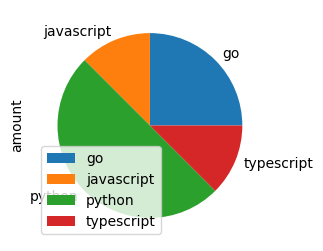

In [31]:
# agrupando e mostrando gráfico

grouped_languages_df = languages_df.groupby('language').agg('sum') # agrega pela soma

grouped_languages_df.plot.pie(y='amount', figsize=(8, 3))

**Pontos** - Gráfico que relaciona variáveis **numéricas**. Vamos utilizar o método `scatter` ([documentação](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.scatter.html)) do pacote MatplotLib.

<AxesSubplot:xlabel='stars', ylabel='forks'>

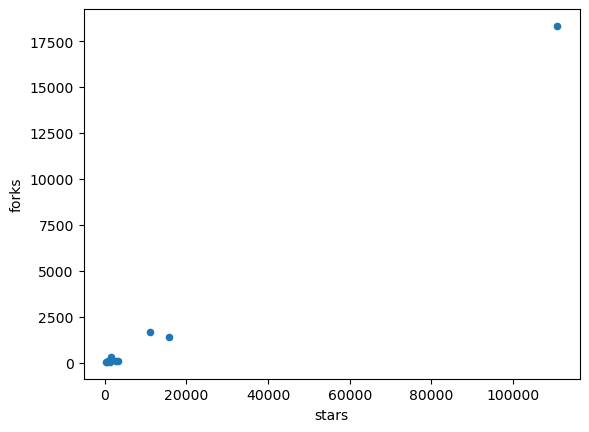

In [32]:
# relação entre o número de stars com o forks

github_df.plot.scatter(x='stars', y='forks')

<AxesSubplot:xlabel='stars', ylabel='forks'>

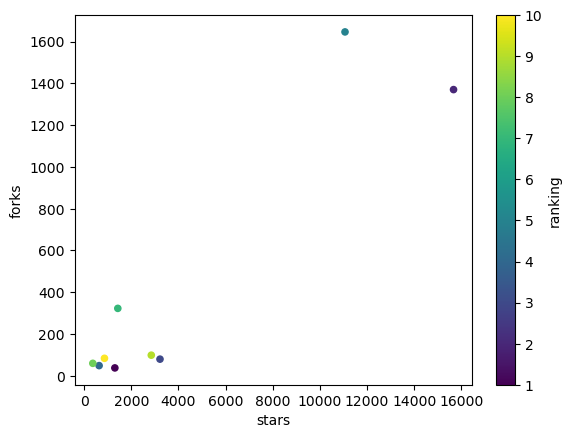

In [33]:
# retirando o outilier filtando o eixo x

github_df.query('stars < 100000').plot.scatter(x='stars', y='forks', c='ranking', colormap='viridis') # ranking para cor

### Valores Nulos
Valores nulos em um DataFrame Pandas ocorrem quando o pacote não consegue interpretar o dado da fonte de dados, exemplos:

- Colunas categóricas com valores vazios (` `);
- Colunas numéricas com valores nulos (`None`);
- etc.

In [34]:
# identificaçao de linhas com algum valor nulo com o método isnull

github_df.isnull() # mostra a tabela inteira, por isso não é usual

,ranking,project,language,stars,stars_today,forks
0,False,False,False,False,False,False
1,False,False,False,False,False,False
2,False,False,False,False,False,False
3,False,False,True,False,False,False
4,False,False,False,False,False,False
5,False,False,False,False,False,False
6,False,False,False,False,False,False
7,False,False,False,False,False,False
8,False,False,False,False,False,False
9,False,False,True,False,False,False


In [35]:
# identificaçao de linhas com algum valor nulo com os métodos isnull e any

github_df.isnull().any() # mostra as colunas, assim identificamos a coluna que há valor nulo

ranking        False
project        False
language        True
stars          False
stars_today    False
forks          False
dtype: bool

In [9]:
# identificando e contando as linhas com valores nulos para cada coluna

github_df.isnull().sum()

ranking        0
project        0
language       2
stars          0
stars_today    0
forks          0
dtype: int64

In [10]:
# verificando as observações onde tem NAs

# github_df[ (github_df.ranking.isnull()) | (github_df.project.isnull()) | (github_df.language.isnull()) ]
github_df[ github_df.language.isnull() ]

,ranking,project,language,stars,stars_today,forks
3,4,defi-developer-road-map,NaN,636,247,49
9,10,self-taught-guide-to-cloud-computing,NaN,863,179,84


In [36]:
# identificaçao de linhas com algum valor nulo com os métodos isnull e any

github_df.isnull().any().any() # mais resumido ainda, diz se há valor nulo no dataframe 

True

In [37]:
# criando a função que identifica se há valor nulo em um dataframe

def has_null(df: pd.DataFrame) -> bool:
    return df.isnull().any().any()

has_null(df=github_df)

True

In [38]:
# remoção de linhas com algum valor nulo com o método dropna

github_df.dropna() # apaga as linhas (4 e 10) que tem valor nulo

# obs.: Regra geral - excluir entre 3% e 5% dos dados está ok

,ranking,project,language,stars,stars_today,forks
0,1,plow,go,1304,574,38
1,2,n8n,typescript,15668,280,1370
2,3,slides,go,3218,265,80
4,5,pytorch-image-models,python,11065,101,1646
5,6,javascript-algorithms,javascript,110768,248,18331
6,7,paddleclas,python,1429,283,323
7,8,reddit_sentiment_trader,python,369,71,60
8,9,augly,python,2849,393,99


In [39]:
has_null(df=github_df.dropna())

False

In [40]:
# preenchimento valores nulos com o método fillna

github_df = pd.read_csv('github.csv', sep=';')

github_df.fillna('') # preenche com ''

,ranking,project,language,stars,stars_today,forks
0,1,plow,go,1304,574,38
1,2,n8n,typescript,15668,280,1370
2,3,slides,go,3218,265,80
3,4,defi-developer-road-map,,636,247,49
4,5,pytorch-image-models,python,11065,101,1646
5,6,javascript-algorithms,javascript,110768,248,18331
6,7,paddleclas,python,1429,283,323
7,8,reddit_sentiment_trader,python,369,71,60
8,9,augly,python,2849,393,99
9,10,self-taught-guide-to-cloud-computing,,863,179,84


In [41]:
has_null(df=github_df.fillna(''))

False

In [ ]:
# para colunas numéricas

df.fillna( df.mean() ) # inserir média no lugar dos NAs

df.fillna( df.median() ) # inserir mediana

df.fillna( df.interpolate() ) # interpolação: Linear

## Visualização de Dados

### Pacote Seaborn
**Seaborn** é um dos pacotes Python mais utilizados para visualização de dados. A documentação pode ser encontrada neste [link](https://seaborn.pydata.org/index.html). Possui diversas opções gráficos (barra, setores, linha, área, etc.) e uma excelente integração com os DataFrames do pacote Python **Pandas**. 

> O **Seaborn** usa o **Matplotlib** ([link](https://matplotlib.org/) da documentação), outro pacote bastante utilizada para visualização de dados.

In [1]:
# este pacote traz alguns datasets prontos

import seaborn as sns

sns.get_dataset_names()

['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'dowjones',
 'exercise',
 'flights',
 'fmri',
 'geyser',
 'glue',
 'healthexp',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'seaice',
 'taxis',
 'tips',
 'titanic']

In [2]:
# carregando o dataset de gorjetas

data = sns.load_dataset("tips")
data.head() # conta/gorjeta/sexo/fumante/almoço/jantar/pessoas

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


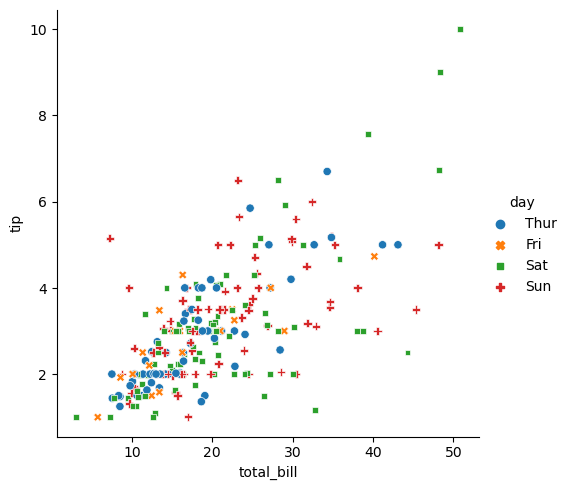

In [3]:
# relplot: gráfico de relacionamento entre duas variáveis

sns.relplot(data=data,x="total_bill", y="tip", hue="day", style="day") # hue: cores, style: formatos

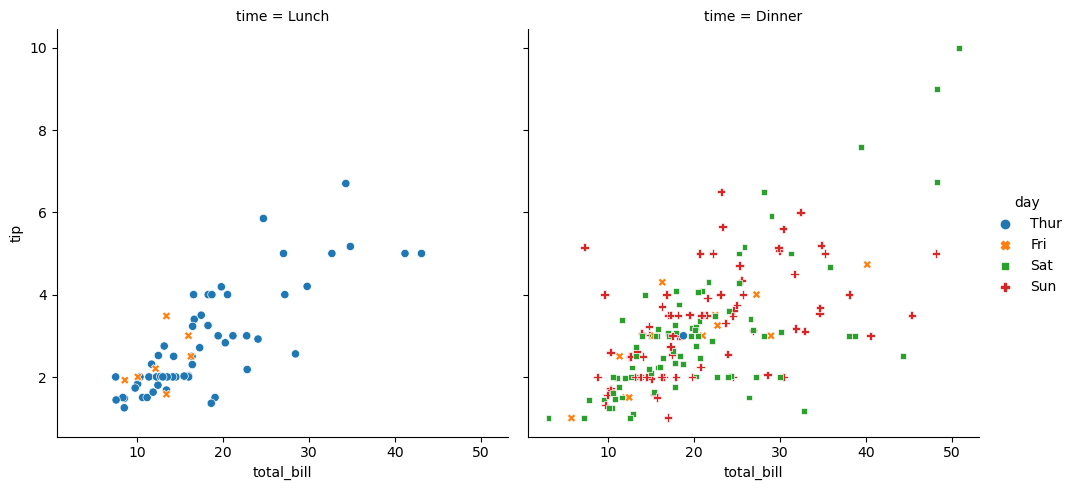

In [3]:
# adicionando mais uma variável e separando gráficos por categoria em colunas

sns.relplot(data=data,x="total_bill", y="tip", hue="day", style="day", col="time")

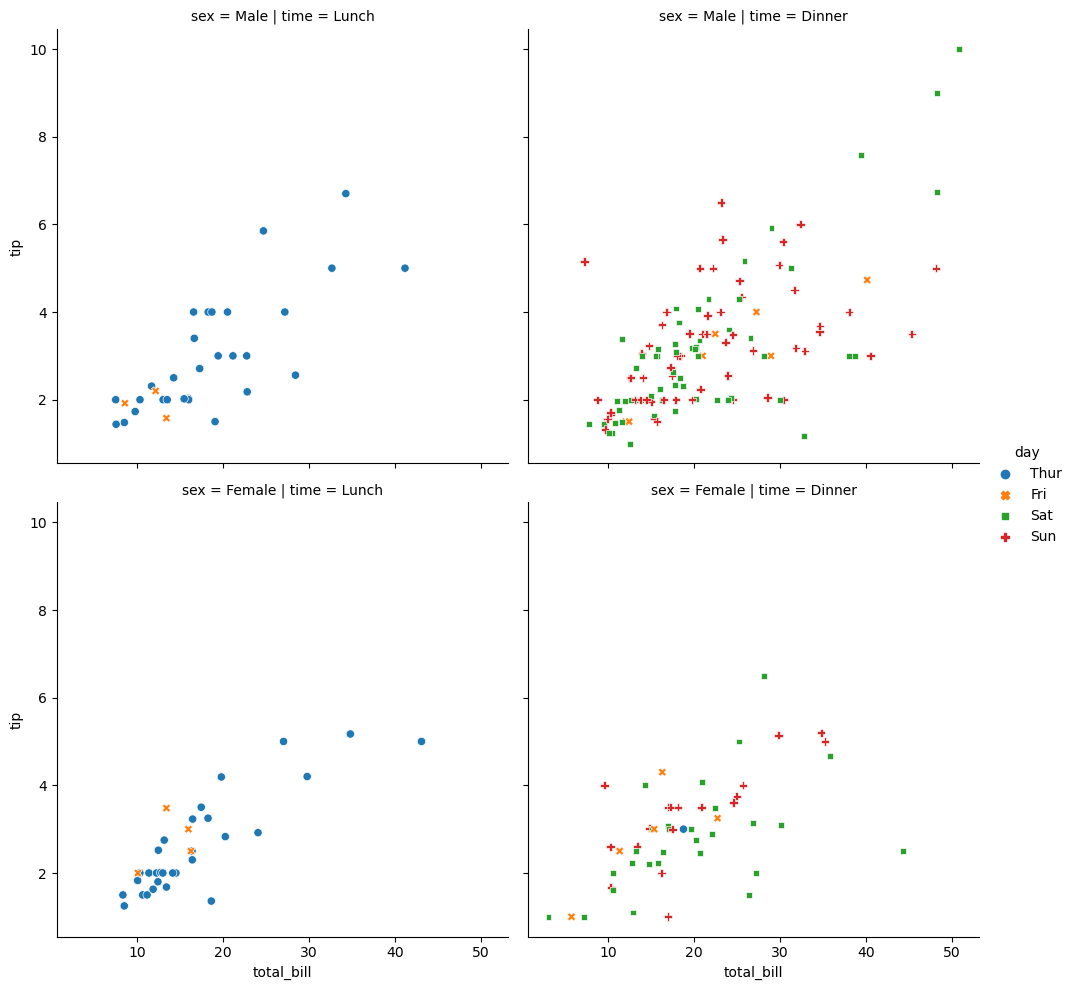

In [3]:
# adicionando mais uma variável e separando gráficos por categoria em colunas e categorias em linhas

sns.relplot(data=data,x="total_bill", y="tip", hue="day", style="day", col="time", row="sex")

**Títulos e Eixos** </br>
Documentação completa com todas as opções de manipulação do texto neste [link](https://matplotlib.org/3.1.1/api/text_api.html). </br>
Obs.: O Seaborn já entrega tudo pronto seguindo boas práticas. Caso vá alterar algo usando o Matplotlib, saiba o que está fazendo.

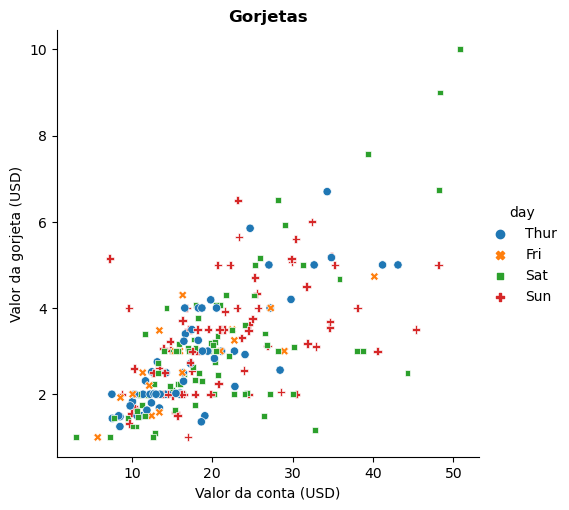

In [6]:
# inserindo título no gráfico e definindo nome dos eixos

grafico = sns.relplot(data=data,x="total_bill", y="tip", hue="day", style="day")

grafico.ax.set_title("Gorjetas", fontsize=12, fontweight="bold");
grafico.set_xlabels("Valor da conta (USD)", fontsize=10);
grafico.set_ylabels("Valor da gorjeta (USD)", fontsize=10);

grafico.fig

**Legenda**

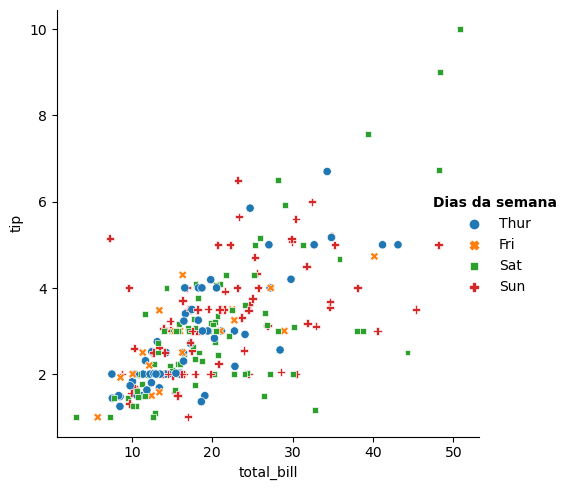

In [5]:
# configurando o título da legenda

grafico = sns.relplot(data=data,x="total_bill", y="tip", hue="day", style="day")

grafico.legend.set_title("Dias da semana", prop={"size": 10, "weight": "bold"})
grafico.fig

**Paleta de Cores**</br>
As paletas de cores podem ser conferidas no [link](https://seaborn.pydata.org/tutorial/color_palettes.html).

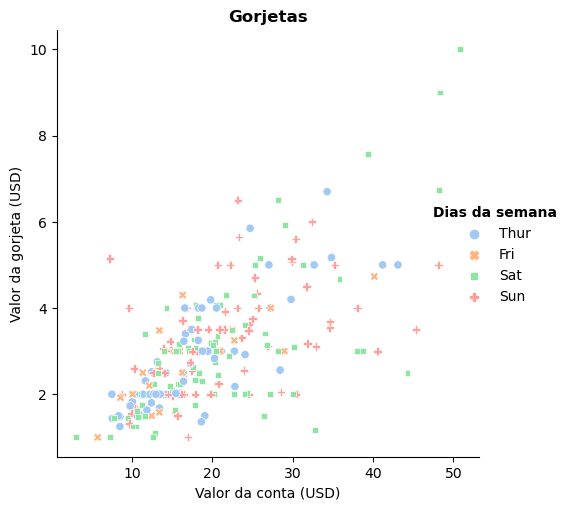

In [3]:
# gráfico com cores pastel

grafico = sns.relplot(data=data,x="total_bill", y="tip", hue="day", style="day", palette='pastel')

grafico.ax.set_title("Gorjetas", fontsize=12, fontweight="bold")
grafico.set_xlabels("Valor da conta (USD)", fontsize=10)
grafico.set_ylabels("Valor da gorjeta (USD)", fontsize=10)
grafico.legend.set_title("Dias da semana", prop={"size": 10, "weight": "bold"})

**Figura**</br>
Conversão: 1 polegada = 2.54 cm 

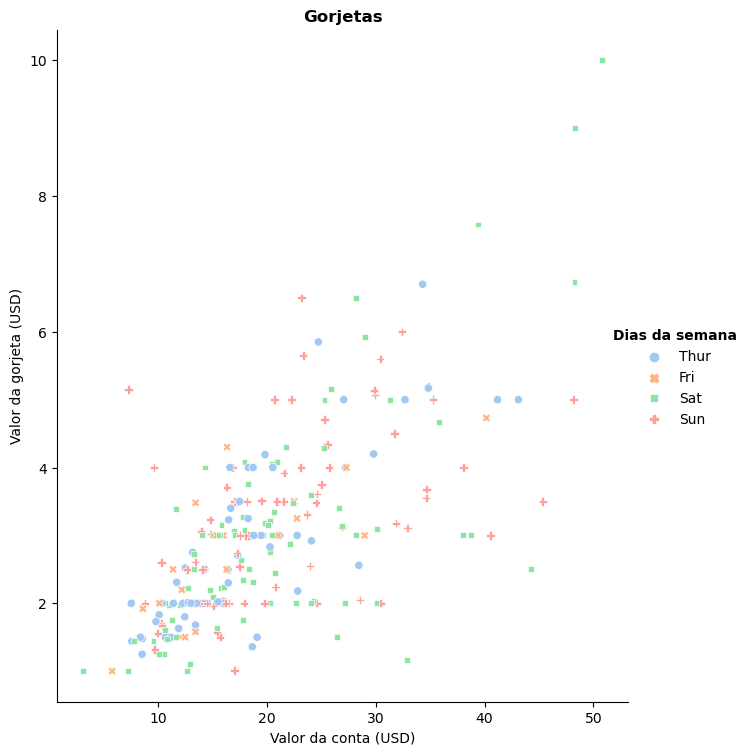

In [5]:
# convertendo altura e largura em cm para polegadas

altura  = 20 / 2.54
largura = 20 / 2.54

grafico.fig.set_size_inches(w=largura, h=altura)
grafico.fig

In [6]:
# salvando em PNG

grafico.fig.savefig(fname="gorjetas.png", bbox_inches="tight")

'''
bbox_inches: A caixa delimitadora (bounding box) a ser usada para determinar a região a ser salva.
Pode ser "tight" para ajustar automaticamente, "standard" para usar uma caixa padrão ou 
uma tupla que define as coordenadas da caixa delimitadora (por exemplo, (0, 0, 6, 4)).

pad_inches: O espaçamento em polegadas para adicionar ao redor da figura.
'''

In [7]:
# salvando em PDF

grafico.fig.savefig(fname="gorjetas.pdf", bbox_inches="tight") # identifica automaticamente o formato

'''
format: Especifica o formato de arquivo desejado para salvar a figura.
Pode ser especificado pela extensão do arquivo ("png", "jpg", "pdf", etc.) ou
por um formato predefinido pelo Matplotlib (por exemplo, "png", "pdf", "svg", etc.).

transparent: Se True, o fundo da imagem será transparente (se suportado pelo formato de arquivo).
'''

### Gráfico de Barras

O **gráfico de barras** representa a relação entre uma variável **categórica** com uma variável **numérica**. Cada entidade da categoria é representada por uma barra, já a altura das barras representam os seus correspondente valor numérico. Útil para entender a distribuição de uma variável categórica.
> O método do pacote Seaborn que constrói este gráfico é o `barplot` ([doc](https://seaborn.pydata.org/generated/seaborn.barplot.html)). 

In [1]:
# carregando a base de dados gorjeta

import seaborn as sns

data = sns.load_dataset("tips")
data.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [2]:
# gerando dataframe com as variáveis de interesse

tips = data[["day", "total_bill"]].groupby("day").agg("sum").reset_index()
tips.head()

,day,total_bill
0,Thur,1096.33
1,Fri,325.88
2,Sat,1778.40
3,Sun,1627.16


'\nci: Controla a exibição do intervalo de confiança em torno da estimativa central.\nVocê pode definir isso como "sd" para desvio padrão ou um valor numérico para o tamanho do intervalo.\n'

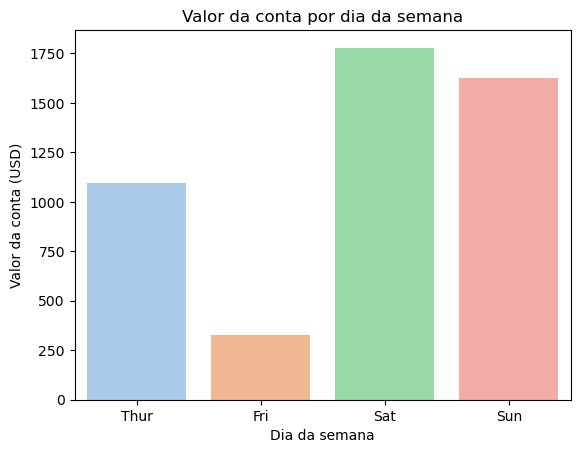

In [32]:
# gráfico de colunas: valor da conta por dia da semana

grafico = sns.barplot(data=tips, x="day", y="total_bill", ci=None, palette="pastel") # ci mostraria o erro

grafico.set(title='Valor da conta por dia da semana', xlabel='Dia da semana', ylabel='Valor da conta (USD)'); # seta tudo

'''
ci: Controla a exibição do intervalo de confiança em torno da estimativa central.
Você pode definir isso como "sd" para desvio padrão ou um valor numérico para o tamanho do intervalo.
'''

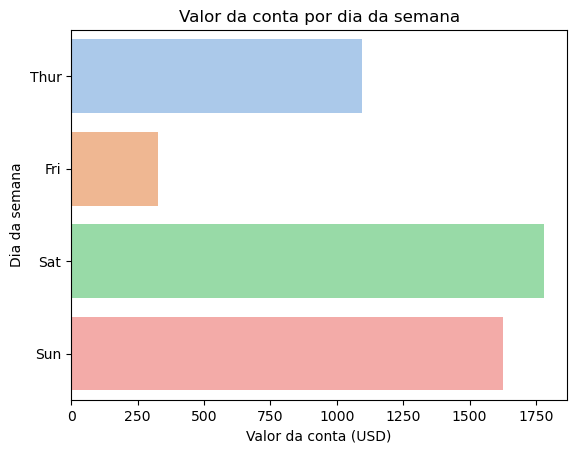

In [34]:
# gráfico de barras

grafico = sns.barplot(data=tips, y="day", x="total_bill", ci=None, palette="pastel") # ordene os valores no dataframe
grafico.set(title='Valor da conta por dia da semana', ylabel='Dia da semana', xlabel='Valor da conta (USD)'); # xticks=[]
# grafico.spines[['top', 'left', 'bottom', 'right']].set_visible(False)
# grafico.tick_params(axis='y', which='both', length=0)
# grafico.bar_label(grafico.containers[0], fontsize=10, color='black')

In [35]:
# gerando dataframe com duas variáveis categóricas e uma numérica

tips = data[["day", "total_bill", "time"]].groupby(["day", "time"]).agg("sum").reset_index()
tips.head(20)

,day,time,total_bill
0,Thur,Lunch,1077.55
1,Thur,Dinner,18.78
2,Fri,Lunch,89.92
3,Fri,Dinner,235.96
4,Sat,Lunch,0.00
5,Sat,Dinner,1778.40
6,Sun,Lunch,0.00
7,Sun,Dinner,1627.16


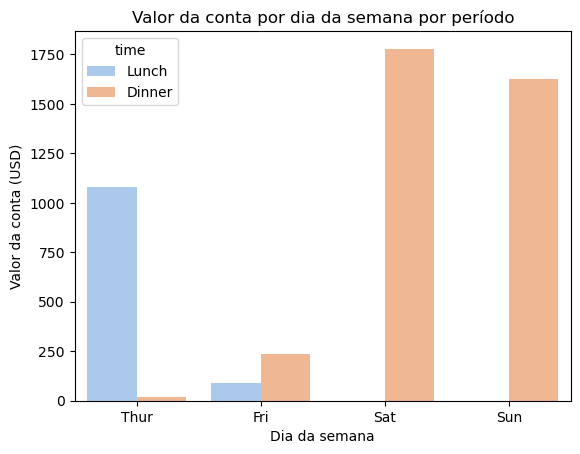

In [40]:
# gráfico de colunas agrupadas

grafico = sns.barplot(data=tips, x="day", y="total_bill", hue="time", palette="pastel") # empilhadas: dodge=False
grafico.set(title='Valor da conta por dia da semana por período', xlabel='Dia da semana', ylabel='Valor da conta (USD)');

### Gráfico de Setores
O **gráfico de setores**, também conhecido como **gráfico de pizza**, representa a proporção entre as entidades de uma variável categórica. Cada entidade da categoria é representada por uma setor de tamanho proporcional a sua respectiva proporção no todo.
> O pacote Seaborn **não possui suporte para gráficos de setores** e recomenda o uso de gráficos de barras. O uso do gráfico de pizza não é recomendado, em geral humanos não são bons para relacionar angulos com proporções.

In [41]:
# carregando a base de dados gorjeta

import seaborn as sns

data = sns.load_dataset("tips")
data.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [42]:
# gerando o dataframe

tips = data[["tip", "day"]].groupby("day").agg("sum").reset_index()
tips["tip_percent"] = 100 * tips["tip"] / tips["tip"].sum() # adiciona coluna de porcentagem
tips.head()

,day,tip,tip_percent
0,Thur,171.83,23.487520
1,Fri,51.96,7.102436
2,Sat,260.40,35.594193
3,Sun,247.39,33.815851


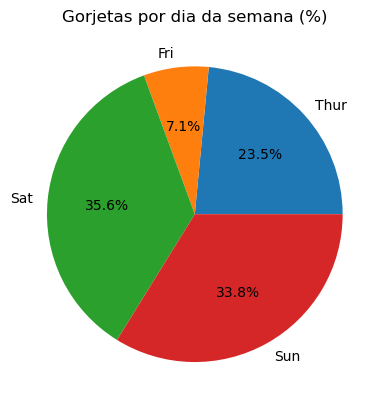

In [51]:
# gerando gráfico

grafico = tips.plot.pie(y="tip_percent", labels=tips["day"], autopct='%1.1f%%', legend=False);
grafico.set(ylabel='', title='Gorjetas por dia da semana (%)');


### Gráfico de Linha
O **gráfico de linha** representa a evolução de uma variável numérica (eixo `y`), geralmente ao longo do tempo (eixo `x`), formando assim uma `série temporal`. Cada valor numérico é representado por pontos conectados por uma linha reta.
> O método do pacote Seaborn que constrói este gráfico é o `lineplot` ([doc](https://seaborn.pydata.org/generated/seaborn.lineplot.html)).

In [2]:
# carregando dataset de vôos

import seaborn as sns

data = sns.load_dataset("flights")
data.head()

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121


In [3]:
# gerando dataframe de número de passageiros por ano

flights = data[["year", "passengers"]].groupby("year").agg("sum").reset_index()
flights.head()

,year,passengers
0,1949,1520
1,1950,1676
2,1951,2042
3,1952,2364
4,1953,2700


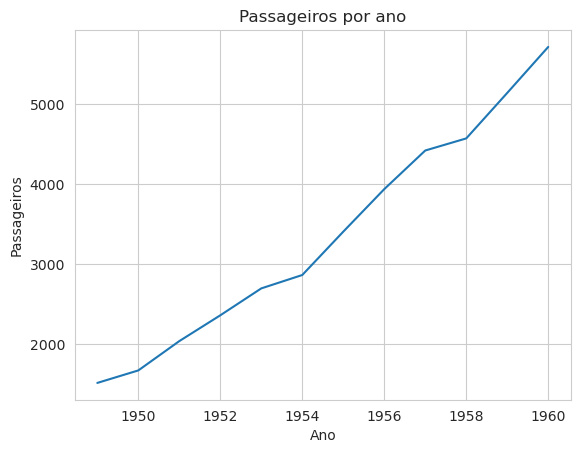

In [7]:
# criando gráfico com contexto

with sns.axes_style('whitegrid'): # contexto
    
    grafico = sns.lineplot(data=flights, x="year", y="passengers", palette="pastel")
    grafico.set(title='Passageiros por ano', xlabel='Ano', ylabel='Passageiros');

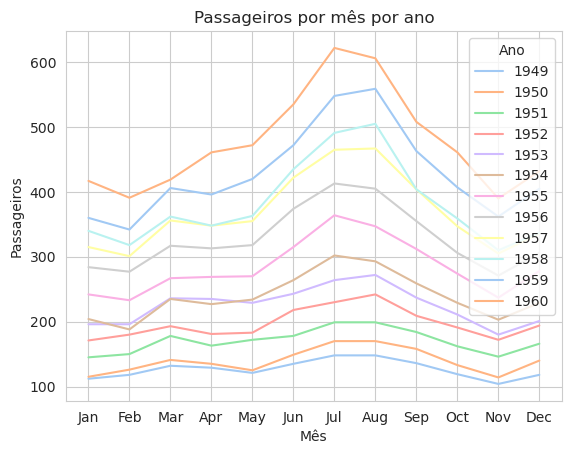

In [8]:
# passageiros por mês por ano

flights = data

with sns.axes_style('whitegrid'):
    grafico = sns.lineplot(data=data, x="month", y="passengers", hue="year", palette="pastel")
    grafico.set(title='Passageiros por mês por ano', xlabel='Mês', ylabel='Passageiros');
    grafico.get_legend().set_title("Ano");

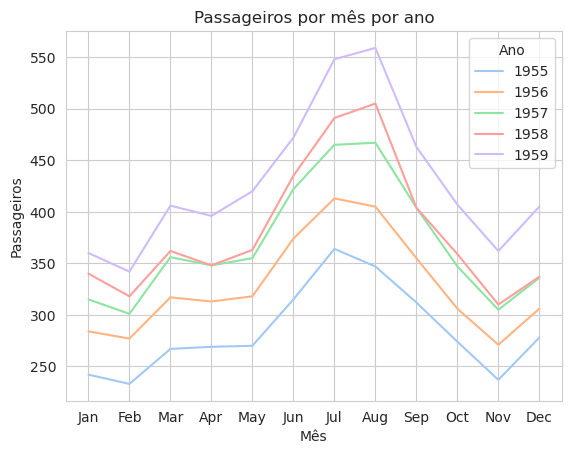

In [9]:
flights = data.query("1955 <= year < 1960")

with sns.axes_style('whitegrid'):
    grafico = sns.lineplot(data=flights, x="month", y="passengers", hue="year", palette="pastel")
    grafico.set(title='Passageiros por mês por ano', xlabel='Mês', ylabel='Passageiros');
    grafico.get_legend().set_title("Ano");

### Gráfico de Área
O **gráfico de área** é similar ao **gráfico de linha** e representa a evolução de uma variável numérica (eixo `y`), geralmente ao longo do tempo (eixo `x`), formando assim uma `série temporal`. Cada valor numérico é representado por pontos conectados por uma linha reta tendo ainda a área entre a linha e o eixo `x` preenchido por uma cor.
> O método do pacote Seaborn que constrói este gráfico é o `lineplot` ([doc](https://seaborn.pydata.org/generated/seaborn.lineplot.html)).

In [18]:
# carregando dataset

import seaborn as sns

data = sns.load_dataset("flights")
data.head()

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121


In [19]:
# gerando dataframe

flights = data[["year", "passengers"]].groupby("year").agg("sum").reset_index()
flights.head()

,year,passengers
0,1949,1520
1,1950,1676
2,1951,2042
3,1952,2364
4,1953,2700


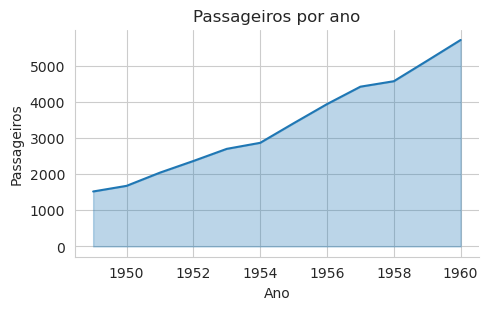

In [20]:
import matplotlib.pyplot as plt

with sns.axes_style('whitegrid'):
    
    grafico = sns.FacetGrid(data=flights, palette="pastel") # cria o gráfico
    grafico.map(sns.lineplot, "year", "passengers") # curva
    grafico.map(plt.fill_between, 'year', 'passengers', alpha=0.3) # preenchimento com matplotlib
    grafico.set(title='Passageiros por ano', xlabel='Ano', ylabel='Passageiros') # titulos
    grafico.fig.set_size_inches(w=15/2.54, h=7.5/2.54)

### Histograma
O **histograma** representa a distribuição de uma variável numérica. A variável numérica é segmentada em intervalos representados por uma barra. Já a altura da barra indica a contagem dos valores presentes na segmentação.
> O método do pacote Seaborn que constrói este gráfico é o `histplot` ([docs](https://seaborn.pydata.org/generated/seaborn.histplot.html#seaborn.histplot)).

Obs.: A variação do tamanho da segmentação por gerar diferentes insights.

In [1]:
# carregando o dataset

import seaborn as sns

data = sns.load_dataset("titanic")
data.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


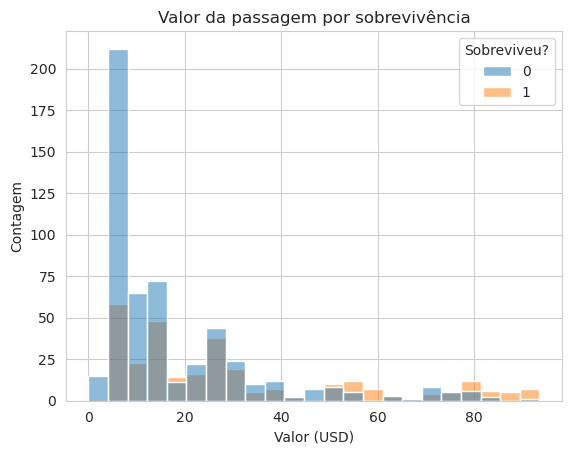

In [7]:
# distribuição do preço das passagens

titanic = data[['fare', 'survived']]
titanic = titanic.query("fare < 100") # retira outliers

with sns.axes_style('whitegrid'):
    
    grafico = sns.histplot(data=titanic, x='fare', hue='survived')
    grafico.set(title='Valor da passagem por sobrevivência', xlabel='Valor (USD)', ylabel='Contagem')
    grafico.get_legend().set_title('Sobreviveu?')

### KDE
O **KDE** (*kernel density estimator*), assim como o histograma, representa a distribuição de uma variável numérica, mas em uma distribuição contínua. A variável numérica é segmentada em intervalos representados por uma **função contínua** estimada. Ajuda a evidênciar a distribuição da variável numérica.
> O método do pacote Seaborn que constrói este gráfico é o `histplot` ([docs](https://seaborn.pydata.org/generated/seaborn.histplot.html#seaborn.histplot)). 

In [8]:
# carregando os dados

import seaborn as sns

data = sns.load_dataset("titanic")
data.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


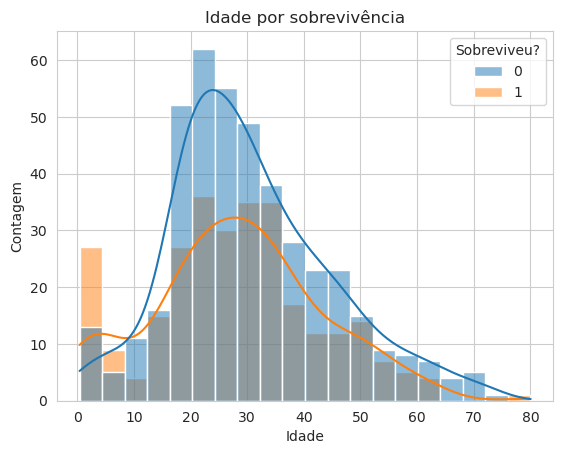

In [9]:
# idade por sobrevivência 

titanic = data[['age', 'survived']]

with sns.axes_style('whitegrid'):
    grafico = sns.histplot(data=titanic, x="age", hue="survived", kde=True) # muda só isso: kde=True
    grafico.set(title='Idade por sobrevivência', xlabel='Idade', ylabel='Contagem')
    grafico.get_legend().set_title("Sobreviveu?")

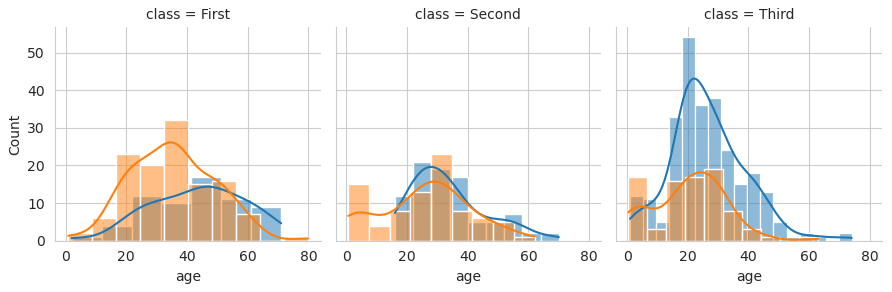

In [10]:
# idade por sobrevivência por classe

titanic = data[['age', 'survived', 'class']]

with sns.axes_style('whitegrid'):
    
    grafico = sns.FacetGrid(data=titanic, col='class',  hue='survived')
    grafico.map(sns.histplot, "age", kde=True)

### Box Plot
O **Box Plot** representa um resumo da distribuição de uma variável numérica. Numa mesmo gráfico mostra a mediana, quartis e *outliers*. É um dos melhores gráficos para representar a distribuição de uma variável numérica.
> O método do pacote Seaborn que constrói este gráfico é o `boxplot` ([docs](https://seaborn.pydata.org/generated/seaborn.histplot.html#seaborn.histplot)). 

In [11]:
# carregando os dados

import seaborn as sns

data = sns.load_dataset("titanic")
data.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


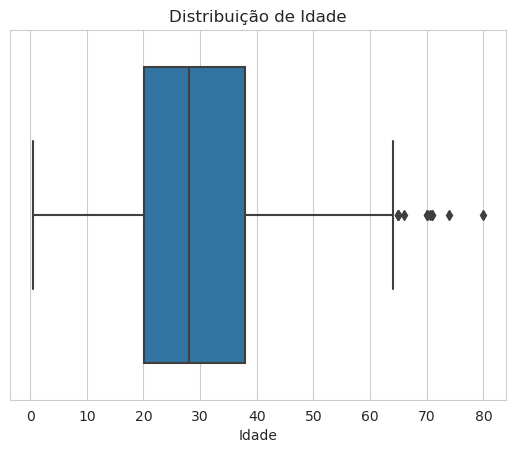

In [12]:
# distribuição de idade

with sns.axes_style('whitegrid'):
    
    grafico = sns.boxplot(x=data['age'])
    grafico.set(title='Distribuição de Idade', xlabel='Idade');

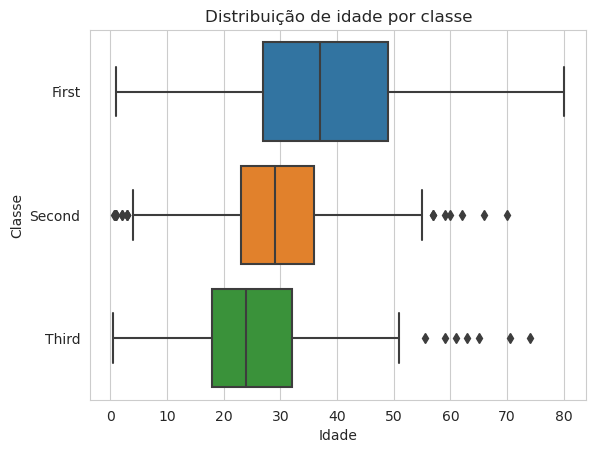

In [13]:
#  mostrando categoria: distribuição de idade por classe

with sns.axes_style('whitegrid'):
    
    grafico = sns.boxplot(x=data['age'], y=data['class']) # adiciona eixo y
    grafico.set(title='Distribuição de idade por classe', xlabel='Idade', ylabel='Classe');

### Gráfico de Dispersão
O **gráfico de dispersão** representa a correlação entre duas variáveis numéricas. Cada valor é representado um ponto P(`x`,`y`). É útil para observar a variação conjunta de duas variáveis.
> O método do pacote Seaborn que constrói este gráfico é o `scatterplot` ([docs](https://seaborn.pydata.org/generated/seaborn.scatterplot.html#seaborn.scatterplot)).

In [14]:
# carregando dataset

import seaborn as sns

data = sns.load_dataset('iris')
data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [15]:
# gerando dataframe só de comprimentos

iris = data[['sepal_length', 'petal_length', 'species']]
iris.head()

,sepal_length,petal_length,species
0,5.1,1.4,setosa
1,4.9,1.4,setosa
2,4.7,1.3,setosa
3,4.6,1.5,setosa
4,5.0,1.4,setosa


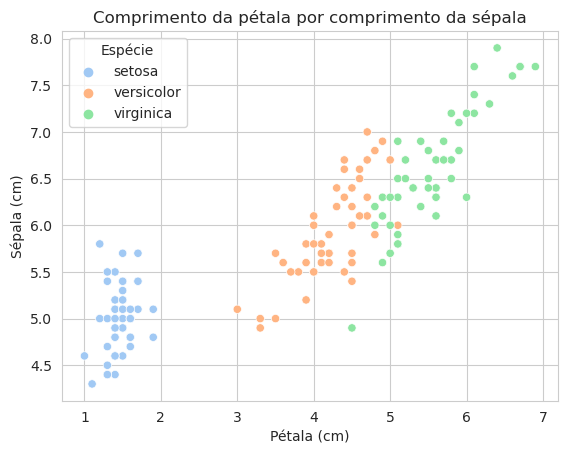

In [16]:
# comprimento da pétala por comprimento da sépala

with sns.axes_style('whitegrid'):
    grafico = sns.scatterplot(data=iris, x='petal_length', y='sepal_length', hue='species', palette='pastel')
    grafico.set(title='Comprimento da pétala por comprimento da sépala', xlabel='Pétala (cm)', ylabel='Sépala (cm)')
    grafico.get_legend().set_title('Espécie');
    
# obs.: perceba a separação dos grupos no resultado

In [17]:
# gerando dataframe com larguras

iris = data[["petal_width", "sepal_width", "species"]]
iris.head()

,petal_width,sepal_width,species
0,0.2,3.5,setosa
1,0.2,3.0,setosa
2,0.2,3.2,setosa
3,0.2,3.1,setosa
4,0.2,3.6,setosa


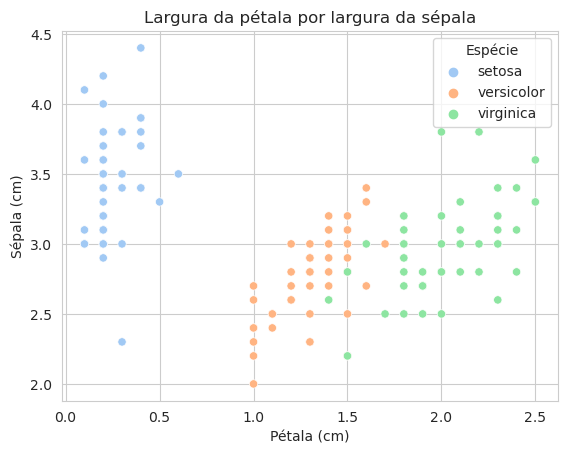

In [18]:
# largura da pétala por largura da sépala

with sns.axes_style('whitegrid'):
    
    grafico = sns.scatterplot(data=iris, x='petal_width', y='sepal_width', hue='species', palette='pastel')
    grafico.set(title='Largura da pétala por largura da sépala', xlabel='Pétala (cm)', ylabel='Sépala (cm)')
    grafico.get_legend().set_title('Espécie');
    
# obs.: também pode ajudar a definir qual a espécie da íris

### Mapa de Calor
O **mapa de calor** representação a correlação entre três variáveis, essencialmente uma representação 2D de um gráfico 3D. Cada valor é representado por um ponto com três coordenadas: `x` e `y` indicam a sua posição e o `z` (necessariamente numérica) a sua intensidade. É útil para observar a distribuição geral dos dados.
> O método do pacote Seaborn que constrói este gráfico é o `heatmap` ([doc](https://seaborn.pydata.org/generated/seaborn.heatmap.html)). 

In [19]:
# carregando o conjunto de dados

import seaborn as sns

data = sns.load_dataset('flights')
data.head()

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121


In [34]:
# distribuição de passageiros por mês por ano

flights = data.pivot('month', 'year', 'passengers') # gera uma tabela matriz (linha, coluna, dist de passageiros)
flights.head()

year,1949,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,1960
month,,,,,,,,,,,,
Jan,112,115,145,171,196,204,242,284,315,340,360,417
Feb,118,126,150,180,196,188,233,277,301,318,342,391
Mar,132,141,178,193,236,235,267,317,356,362,406,419
Apr,129,135,163,181,235,227,269,313,348,348,396,461
May,121,125,172,183,229,234,270,318,355,363,420,472


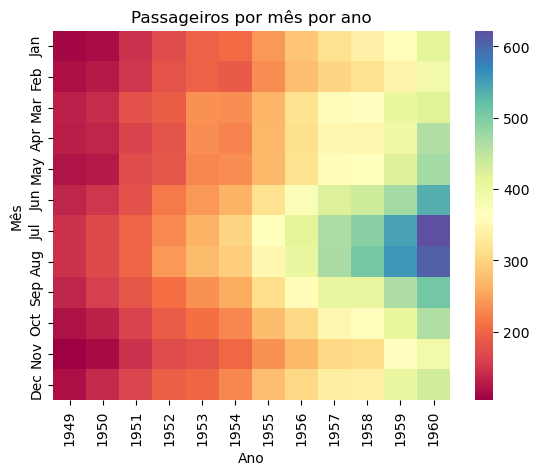

In [38]:
# mapa de calor

grafico = sns.heatmap(data=flights, cmap="Spectral") # escala de cores
grafico.set(title='Passageiros por mês por ano', xlabel='Ano', ylabel='Mês');

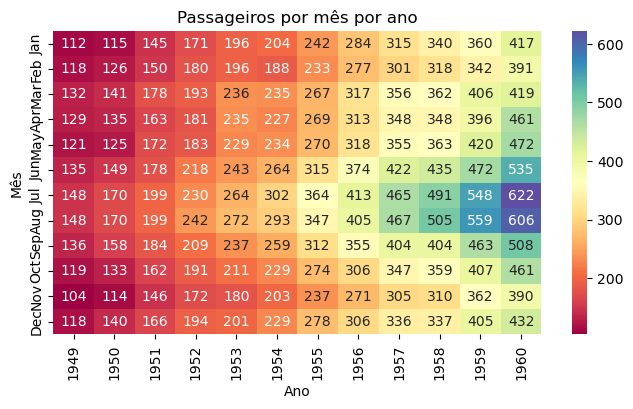

In [39]:
# adicionando valores ao mapa de calor

grafico = sns.heatmap(data=flights, cmap='Spectral', annot=True, fmt='d')
grafico.set(title='Passageiros por mês por ano', xlabel='Ano', ylabel='Mês');
grafico.figure.set_size_inches(w=20/2.54, h=10/2.54)